### Import essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from typing import *
import warnings
warnings.filterwarnings('ignore')

# Initial Data Investigation 

### Dataset Loading & Structure

In [2]:
sales=pd.read_csv("Online Sales Data (Zeyad).csv")
sales

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01 00:00:00,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02 00:00:00,Home Appliances,NaN,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03 00:00:00,Clothing,NaN,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04 00:00:00,Books,NaN,NaN,15.99,63.96,North America,Credit Card
4,10005,2024-01-05 00:00:00,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
1150,10365,2024-08-14,Books,NaN,3,362.42,1087.26,Europe,NaN
1151,10998,2024-01-12,Sports,NaN,1,468.09,468.09,Europe,Credit Card
1152,10675,2024-05-22,Electronics,NaN,1,224.6,224.60,Europe,Credit Card
1153,10837,2024-09-04,Clothing,NaN,1,1.03,1.03,North America,Credit Card


In [3]:
sales.shape

(1155, 9)

In [4]:
sales.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Product Name      232 non-null    object 
 4   Units Sold        982 non-null    object 
 5   Unit Price        1155 non-null   object 
 6   Total Revenue     1155 non-null   float64
 7   Region            1134 non-null   object 
 8   Payment Method    983 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 81.3+ KB


### Data Types Analysis

In [6]:
sales.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold           object
Unit Price           object
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

There are some issues in the datatype of the columns

### Initial Content Examination
Let's explore the format of columns with incorrect datatype

In [7]:
sales.sample(n=10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
593,10594,2025-04-10,Sports,NaN,3,711.42,1918.74,Europe,NaN
726,10727,2025-02-23,Home Appliances,NaN,2,511.15,1022.30,Europe,NaN
655,10656,2025-02-20,Clothing,Gap High Rise Skinny Jeans,4,699.04,2796.16,Asia,Debit Card
95,10096,2024-04-05 00:00:00,Sports,NaN,1,999.99,999.99,Asia,Credit Card
1058,11059,2024-07-13,Beauty Products,NaN,1,681.18,681.18,Asia,PayPal
142,10143,2024-05-22 00:00:00,Beauty Products,NaN,1,29.5,29.50,Europe,PayPal
1122,10997,2024-05-19,Books,Books Advanced 292,1,1.0,1.00,Europe,NaN
1079,11080,2024-01-22,Books,NaN,1,693.7,693.70,North America,Debit Card
311,10312,2025-01-02,Books,NaN,2,986.94,1973.88,Asia,Credit Card
438,10439,2024-09-19,Beauty Products,NaN,1,508.21,508.21,Europe,Credit Card


look like there is inconsistent format of the data in Units sold (3.0x),date (date with time and without it)
and outlier in unit price of books category (973.53)

note: this notebook runs multiple times so the cell above does not contain results that i spotted

In [8]:
sales.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01 00:00:00,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02 00:00:00,Home Appliances,NaN,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03 00:00:00,Clothing,NaN,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04 00:00:00,Books,NaN,NaN,15.99,63.96,North America,Credit Card
4,10005,2024-01-05 00:00:00,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [9]:
sales.tail()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
1150,10365,2024-08-14,Books,NaN,3,362.42,1087.26,Europe,NaN
1151,10998,2024-01-12,Sports,NaN,1,468.09,468.09,Europe,Credit Card
1152,10675,2024-05-22,Electronics,NaN,1,224.6,224.60,Europe,Credit Card
1153,10837,2024-09-04,Clothing,NaN,1,1.03,1.03,North America,Credit Card
1154,10236,2024-08-23 00:00:00,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,165.78,165.78,Europe,PayPal


as mentioned above there are outliers in unit price of books category and clothing (1.03 -> must be investigated)
and there are inconsistent data format in unit price ($362.93-ERROR)

In [10]:
sales['Unit Price'].unique()

array(['999.99', '499.99', '69.99', '15.99', '89.99', '29.99', '2499.99',
       '599.99', '25.99', '129.99', '199.99', '749.99', '189.99',
       '249.99', '35.99', '399.99', '119.99', '99.99', '59.99', '22.99',
       '49.99', '299.99', '179.99', '12.99', '349.99', '19.99', '39.99',
       '1895.0', '799.99', '24.99', '105.0', '139.99', '32.5', '52.0',
       '154.99', '26.99', '49.0', '28.0', '23.0', '349.0', '9.99',
       '18.99', '102.0', '1199.99', '219.99', '10.99', '78.0', '1599.99',
       '899.99', '14.99', '16.0', '100.0', '1299.99', '79.99', '13.99',
       '68.0', '82.0', '109.99', '3899.99', '6.5', '229.99', '159.99',
       '15.0', '229.95', '299.95', '16.99', '30.0', '98.0', '8.99',
       '36.0', '39.95', '34.99', '6.8', '99.95', '1499.99', '44.99',
       '11.99', '29.5', '549.0', '199.95', '25.0', '149.99', '54.99',
       '59.0', '499.95', '7.99', '699.99', '14.9', '34.0', '146.0',
       '649.99', '190.0', '399.0', '199.0', '18.0', '169.95', '125.0',
       '449.9

In [11]:
sales[sales['Unit Price'].str.contains('$')]

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01 00:00:00,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02 00:00:00,Home Appliances,NaN,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03 00:00:00,Clothing,NaN,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04 00:00:00,Books,NaN,NaN,15.99,63.96,North America,Credit Card
4,10005,2024-01-05 00:00:00,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
1150,10365,2024-08-14,Books,NaN,3,362.42,1087.26,Europe,NaN
1151,10998,2024-01-12,Sports,NaN,1,468.09,468.09,Europe,Credit Card
1152,10675,2024-05-22,Electronics,NaN,1,224.6,224.60,Europe,Credit Card
1153,10837,2024-09-04,Clothing,NaN,1,1.03,1.03,North America,Credit Card


In [12]:
sales[sales['Unit Price'].str.contains('ERROR')]

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
534,10535,2024-12-28,Books,NaN,1,$362.93-ERROR,362.93,Asia,Gift Card
677,10678,2024-09-10,Sports,NaN,2,$782.64-ERROR,1565.28,North America,NaN
878,10879,2024-06-18,Books,NaN,NaN,$1.0-ERROR,3.00,North America,PayPal
963,10964,2024-09-01,Electronics,Electronics Pro 614,2,$911.1-ERROR,1822.20,Asia,Credit Card
981,10982,2024-12-04,Beauty Products,NaN,3,$968.4-ERROR,2905.20,Asia,NaN
1047,11048,2024-02-06,Electronics,NaN,1,$835.87-ERROR,921.84,Europe,NaN
1107,11048,2024-02-06,Electronics,NaN,1,$835.87-ERROR,835.87,Europe,NaN


In [13]:
sales['Units Sold'].unique()

array(['2', '1', '3', nan, '6', '4', '5', '10', '97', '340', '245', '499',
       '422', '145', '266', '258', '395', '437', '3.0x', '445', '100',
       '495', '474', '371', '337', '475', '216', '238', '132', '333',
       '253', '80', '415', '331', '338', '354', '274', '1.0x', '156',
       '273', '207', '439', '229', '451', '489', '283', '83', '399',
       '364', '350', '157', '342', '471', '75', '2.0x', '438', '301',
       '231', '426', '430', '418', '356', '141', '188', '225', '249',
       '161', '195', '254', '388', '494', '306', '215', '411', '228'],
      dtype=object)

In [14]:
sales[sales['Units Sold'].str.contains('x',na=False)]

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
372,10373,2024-01-08,Books,1984 by George Orwell,3.0x,973.53,2920.59,North America,Credit Card
602,10603,2024-01-31,Beauty Products,NaN,1.0x,452.36,452.36,NaN,Cryptocurrency
735,10736,2024-05-07,Sports,Bose SoundLink Color Bluetooth Speaker II,1.0x,469.16,469.16,Asia,PayPal
828,10829,2025-04-09,Books,The Road by Cormac McCarthy,2.0x,100.87,201.74,North America,Credit Card
863,10864,2025-01-17,Beauty Products,Beauty Products Premium 998,1.0x,94.12,94.12,North America,Credit Card
1130,10373,2024-01-08,Books,1984 by George Orwell,3.0x,973.53,2920.59,North America,Credit Card


In [15]:
sales['Date'].unique()

array(['2024-01-01 00:00:00', '2024-01-02 00:00:00',
       '2024-01-03 00:00:00', '2024-01-04 00:00:00',
       '2024-01-05 00:00:00', '2024-01-06 00:00:00',
       '2024-01-07 00:00:00', '2024-01-08 00:00:00',
       '2024-01-09 00:00:00', '2024-01-10 00:00:00',
       '2024-01-11 00:00:00', '2024-01-12 00:00:00',
       '2024-01-13 00:00:00', '2024-01-14 00:00:00',
       '2024-01-15 00:00:00', '2024-01-16 00:00:00',
       '2024-01-17 00:00:00', '2024-01-18 00:00:00',
       '2024-01-19 00:00:00', '2024-01-20 00:00:00',
       '2024-01-21 00:00:00', '2024-01-22 00:00:00',
       '2024-01-23 00:00:00', '2024-01-24 00:00:00',
       '2024-01-25 00:00:00', '2024-01-26 00:00:00',
       '2024-01-27 00:00:00', '2024-01-28 00:00:00',
       '2024-01-29 00:00:00', '2024-01-30 00:00:00',
       '2024-01-31 00:00:00', '2024-02-01 00:00:00',
       '2024-02-02 00:00:00', '2024-02-03 00:00:00',
       '2024-02-04 00:00:00', '2024-02-05 00:00:00',
       '2024-02-06 00:00:00', '2024-02-07 00:0

### Basic Statistics Overview

In [16]:
sales.describe()

,Transaction ID,Total Revenue
count,1155.000000,1.155000e+03
mean,10554.246753,1.531362e+04
std,318.133931,9.172878e+04
min,10001.000000,8.600000e-01
25%,10277.500000,5.831000e+01
50%,10555.000000,4.499900e+02
75%,10831.500000,1.209760e+03
max,11100.000000,2.019764e+06


may be there are outliers in total revenue

### Categorical Variable Exploration 

In [17]:
sales.describe(include='object')

,Date,Product Category,Product Name,Units Sold,Unit Price,Region,Payment Method
count,1155,1155,232,982,1155,1134,983
unique,641,6,171,74,777,3,7
top,2024-12-16,Electronics,Bose QuietComfort 35 Headphones,1,1.0,North America,Credit Card
freq,7,202,5,394,222,384,478


Examine columns that supposed to be object only 

In [18]:
columns=['Product Category','Region','Payment Method']
for i in columns:
    print('Values in',i,'column=\n',sales[i].value_counts())
    print('----------------------------------------------')

Values in Product Category column=
 Product Category
Electronics        202
Sports             193
Clothing           192
Books              192
Beauty Products    190
Home Appliances    186
Name: count, dtype: int64
----------------------------------------------
Values in Region column=
 Region
North America    384
Europe           379
Asia             371
Name: count, dtype: int64
----------------------------------------------
Values in Payment Method column=
 Payment Method
Credit Card       478
PayPal            286
Debit Card        161
Cryptocurrency     20
Mobile Payment     15
Gift Card          15
Bank Transfer       8
Name: count, dtype: int64
----------------------------------------------


In [19]:
sales['Product Name'].unique()

array(['iPhone 14 Pro', nan, 'Neutrogena Skincare Set',
       'Dune by Frank Herbert', '1984 by George Orwell',
       'Estee Lauder Advanced Night Repair', 'GoPro HERO10 Black',
       'Becoming by Michelle Obama', 'Clinique Moisture Surge',
       'Ray-Ban Aviator Sunglasses', 'Shiseido Ultimate Sun Protector',
       'Titleist Pro V1 Golf Balls', 'KitchenAid Artisan Stand Mixer',
       'Educated by Tara Westover', 'Nintendo Switch',
       'Hanes ComfortSoft T-Shirt', 'Puma Suede Classic Sneakers',
       'Nike Metcon 6', 'HP Spectre x360 Laptop',
       'Tommy Hilfiger Polo Shirt', 'Rogue Fitness Kettlebell',
       'Dyson Pure Cool Link', "Levi's Trucker Jacket",
       'Charlotte Tilbury Magic Cream', 'On Running Cloud Shoes',
       'Adidas Originals Superstar Sneakers', 'Tatcha The Water Cream',
       'Vitamix Explorian Blender', 'Canon EOS R5 Camera',
       'H&M Slim Fit Jeans', 'The Girl on the Train by Paula Hawkins',
       'The Ordinary Niacinamide Serum', 'Old Navy Re

### Data Volume Assessment

In [20]:
sales.nunique()

Transaction ID      1100
Date                 641
Product Category       6
Product Name         171
Units Sold            74
Unit Price           777
Total Revenue        860
Region                 3
Payment Method         7
dtype: int64

### Data Volume Assessment

In [21]:
sales['Date'].value_counts()

Date
2024-12-16             7
2024-05-07             7
2024-02-21             7
2024-11-10             6
2024-05-19             6
                      ..
2024-06-18 00:00:00    1
2024-06-17 00:00:00    1
2024-06-16 00:00:00    1
2024-06-14 00:00:00    1
2024-05-06             1
Name: count, Length: 641, dtype: int64

In [22]:
sales['Date'].min()

'2024-01-01'

In [23]:
sales['Date'].max()

'2025-04-23'

In [24]:
sales['Product Name'].value_counts()

Product Name
Bose QuietComfort 35 Headphones         5
Microsoft Surface Laptop 4              4
1984 by George Orwell                   4
On Running Cloud Shoes                  4
Gap 1969 Original Fit Jeans             3
                                       ..
GlamGlow Supermud Clearing Treatment    1
The Power of Now by Eckhart Tolle       1
Neutrogena Hydro Boost Water Gel        1
Clothing Advanced 833                   1
Clothing Plus 487                       1
Name: count, Length: 171, dtype: int64

# Deliverable:
- This Dataset contains of 1155 rows and 9 columns. 

    Covering Jan 2024 to April 2025 with 1100 unique transactions, 6 Product category, 3 Regions, and 7 payment methods; 
    ensuring Diversity and ease in Transactions.

    Containing the following issues:

        1- Missing values: Product Name, Units Sold, Region, and Payment Method 

        2- Inconsistent data formats: Units Sold, and Unit Price

        3- Wrong Datatype: Date, Units Sold, and Unit Price

        4- Potential Outliers(needs to be checked): Total Revenue,unit price


# Data Quality Assessment & Cleaning

### Missing Values Analysis

In [25]:
sales.isna().sum()

Transaction ID        0
Date                  0
Product Category      0
Product Name        923
Units Sold          173
Unit Price            0
Total Revenue         0
Region               21
Payment Method      172
dtype: int64

In [26]:
value=(sales.isna().sum()/sales.shape[0])*100
value

Transaction ID       0.000000
Date                 0.000000
Product Category     0.000000
Product Name        79.913420
Units Sold          14.978355
Unit Price           0.000000
Total Revenue        0.000000
Region               1.818182
Payment Method      14.891775
dtype: float64

In [27]:
missing=pd.DataFrame({'value':sales.isna().sum(),'percentage':value})
missing

,value,percentage
Transaction ID,0,0.000000
Date,0,0.000000
Product Category,0,0.000000
Product Name,923,79.913420
Units Sold,173,14.978355
Unit Price,0,0.000000
Total Revenue,0,0.000000
Region,21,1.818182
Payment Method,172,14.891775


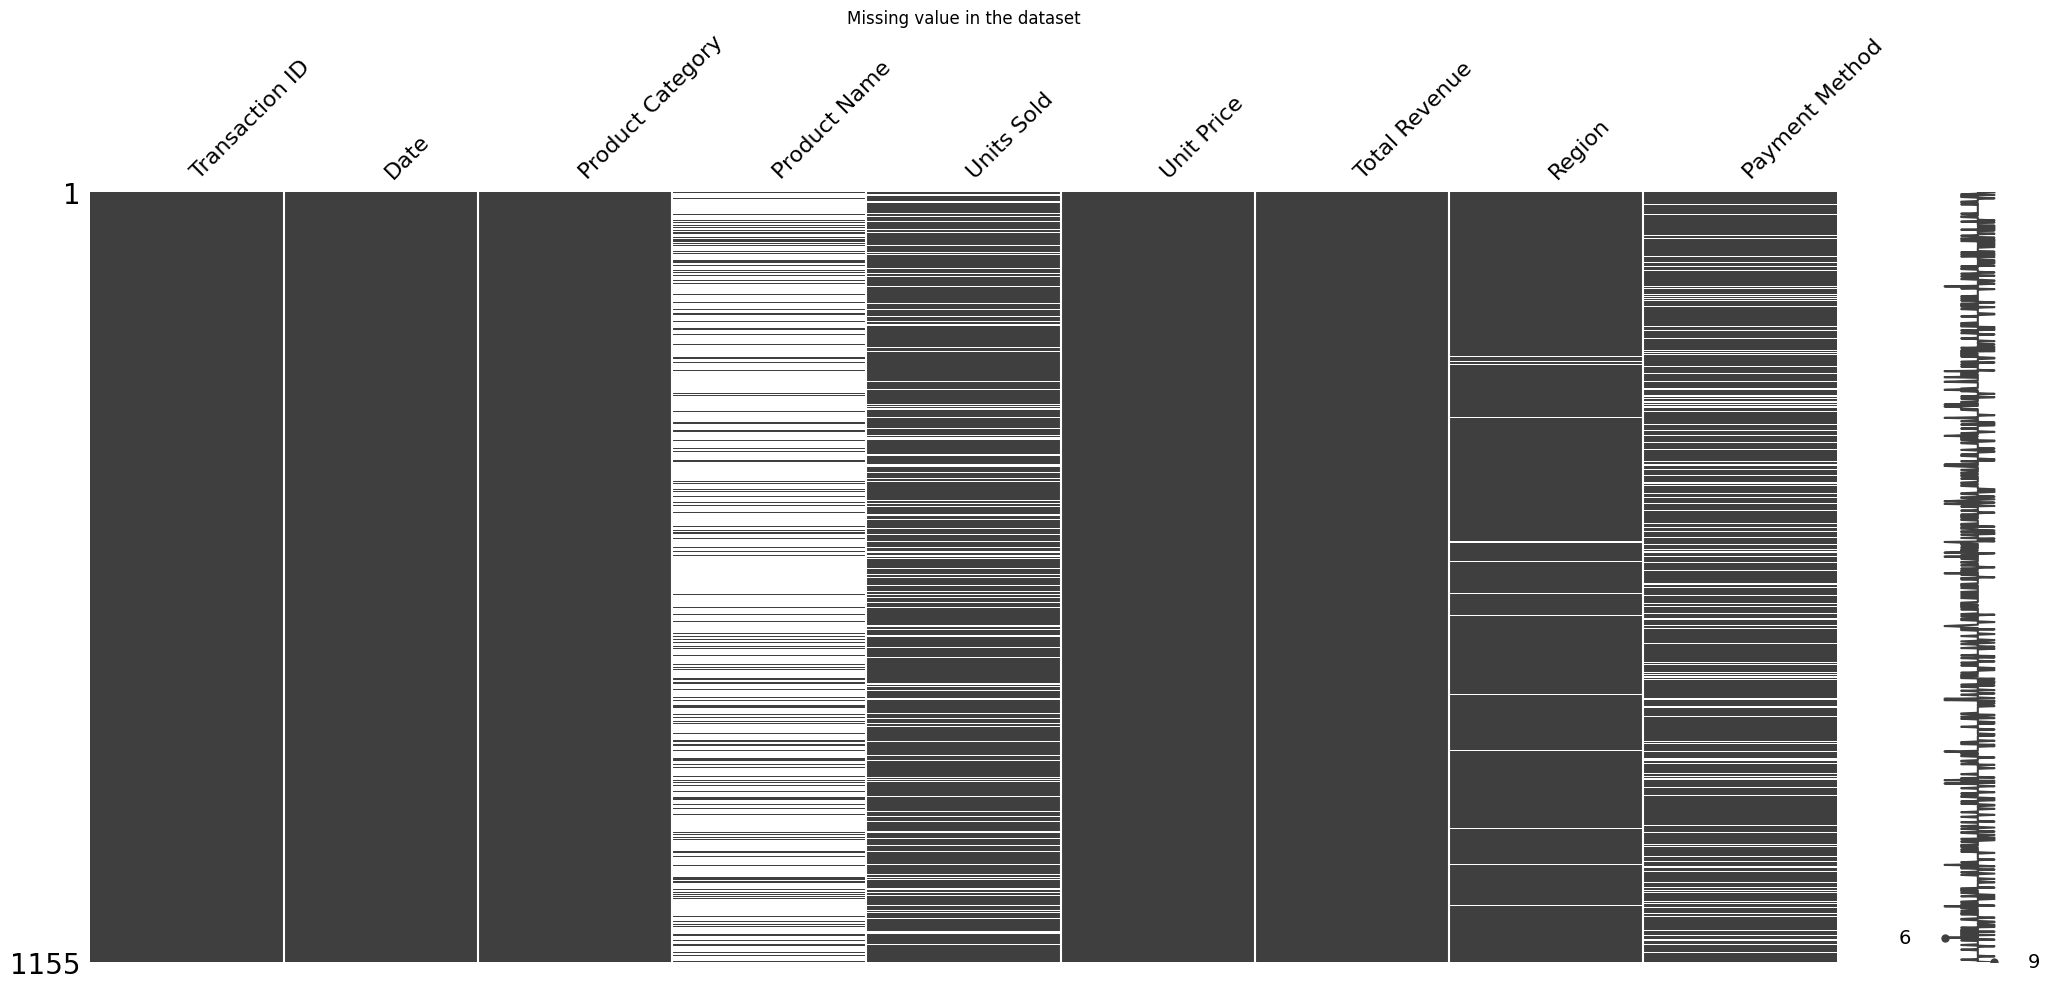

In [28]:
import missingno as msno
msno.matrix(sales)
plt.title('Missing value in the dataset')
plt.show()

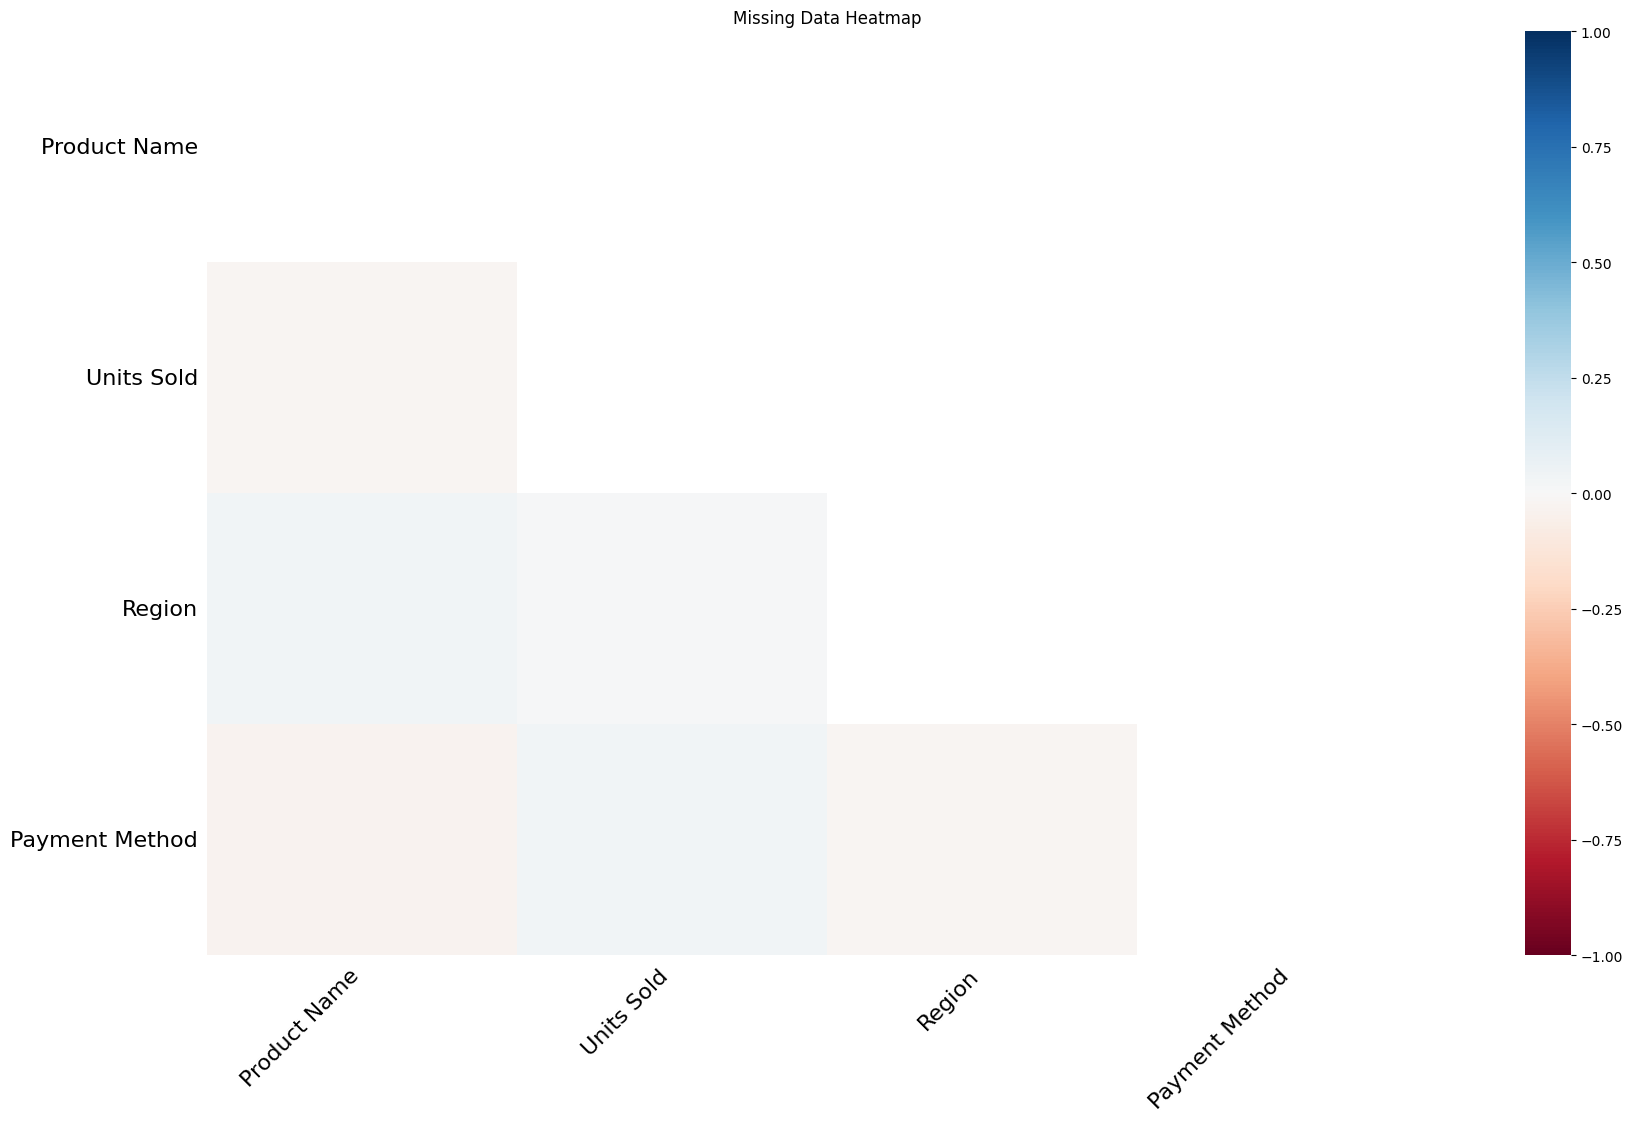

In [29]:
msno.heatmap(sales)
plt.title('Missing Data Heatmap')
plt.show()

Missingness mechaism

Payment method => MAR, may be related to other columns like region 
    impute using region based payment method

Units sold => MAR, may be related to total revenue and units sold 
    impute from total revenue and units sold

Product name => MNAR, the rarity of this column likely not to be random
    which would be deleted

Region => MNAR, in the instruction we have four regions and the dataset only have 3 which may be a data collection issue that lead to missingness
    impute with the fourth region

first, drop 'product name' column

In [30]:
sales.drop(columns='Product Name',inplace=True)
sales.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Units Sold',
       'Unit Price', 'Total Revenue', 'Region', 'Payment Method'],
      dtype='object')

impute region with the fourth value 'South America'

In [31]:
sales['Region'].fillna('South America',inplace=True)
sales['Region'].unique()

array(['North America', 'Europe', 'Asia', 'South America'], dtype=object)

impute payment method using region

In [32]:
sales['Payment Method']=sales.groupby('Region')['Payment Method'].transform(lambda x: x.fillna(x.mode().iloc[0]))

impute units sold with total revenue and unit price

but first let's handle the incosistent format in it

In [33]:
def clean(col: Union[str,float]) -> Union[str,float]:
    '''
        clean values in Units Sold column to standardize the format

        params:
        col: value in the column which is a string or float (nan)

        returns:
        cleaned string and float as it is
        
    '''
    if type(col)==str:
        value=col.split('x')[0]
        value=value.strip()
        return value

    return col

sales['Units Sold']=sales['Units Sold'].apply(clean)
sales['Units Sold'].unique()

array(['2', '1', '3', nan, '6', '4', '5', '10', '97', '340', '245', '499',
       '422', '145', '266', '258', '395', '437', '3.0', '445', '100',
       '495', '474', '371', '337', '475', '216', '238', '132', '333',
       '253', '80', '415', '331', '338', '354', '274', '1.0', '156',
       '273', '207', '439', '229', '451', '489', '283', '83', '399',
       '364', '350', '157', '342', '471', '75', '2.0', '438', '301',
       '231', '426', '430', '418', '356', '141', '188', '225', '249',
       '161', '195', '254', '388', '494', '306', '215', '411', '228'],
      dtype=object)

In [34]:
def clean_price(col: str) -> str:
    '''
    clean values in Unit Price column to stadardize the format

    params:
    col: value of the column which is a string

    returns:
    cleaned price as a string
    or string as it is if it doesn't have any issue
    
    '''
    if '-' in col:
        value=col.split('-')[0]
        res=value.split('$')
        return res[1]
    
    return col

sales['Unit Price']=sales['Unit Price'].apply(clean_price)
sales['Unit Price'].unique()

array(['999.99', '499.99', '69.99', '15.99', '89.99', '29.99', '2499.99',
       '599.99', '25.99', '129.99', '199.99', '749.99', '189.99',
       '249.99', '35.99', '399.99', '119.99', '99.99', '59.99', '22.99',
       '49.99', '299.99', '179.99', '12.99', '349.99', '19.99', '39.99',
       '1895.0', '799.99', '24.99', '105.0', '139.99', '32.5', '52.0',
       '154.99', '26.99', '49.0', '28.0', '23.0', '349.0', '9.99',
       '18.99', '102.0', '1199.99', '219.99', '10.99', '78.0', '1599.99',
       '899.99', '14.99', '16.0', '100.0', '1299.99', '79.99', '13.99',
       '68.0', '82.0', '109.99', '3899.99', '6.5', '229.99', '159.99',
       '15.0', '229.95', '299.95', '16.99', '30.0', '98.0', '8.99',
       '36.0', '39.95', '34.99', '6.8', '99.95', '1499.99', '44.99',
       '11.99', '29.5', '549.0', '199.95', '25.0', '149.99', '54.99',
       '59.0', '499.95', '7.99', '699.99', '14.9', '34.0', '146.0',
       '649.99', '190.0', '399.0', '199.0', '18.0', '169.95', '125.0',
       '449.9

In [35]:
sales['Unit Price']=sales['Unit Price'].astype('float')
sales.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Units Sold           object
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

In [36]:
# impute with total revenue and unit price
sales['Units Sold']=sales['Units Sold'].fillna(round(sales['Total Revenue']/sales['Unit Price'],0))
sales['Units Sold'].isna().sum()

0

### Data Type Validation 

In [37]:
# as data has inconsistent format, so we handle it before conversion
sales['Date'] = sales['Date'].str.split(" ").str[0]  
sales['Date'] = pd.to_datetime(sales['Date'], format="%Y-%m-%d")

In [38]:
# there was an issue in the format of the column, 
# so i standerdized the format first then convert it to int
sales['Units Sold']=sales['Units Sold'].astype('float')
sales['Units Sold']=sales['Units Sold'].astype('int')
sales.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Units Sold                   int32
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object

### Duplicate Detection

In [39]:
# complete duplcates
sales.duplicated().sum()

36

In [40]:
sales.drop_duplicates(inplace=True)

In [41]:
# incomplete duplicates
sales['Transaction ID'].value_counts() 

Transaction ID
10892    2
10837    2
10998    2
11055    2
10236    2
        ..
10377    1
10378    1
10379    1
10380    1
11100    1
Name: count, Length: 1100, dtype: int64

In [42]:
sales[sales['Transaction ID']==10892]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
891,10892,2024-12-17,Books,1,68.12,68.12,Asia,Mobile Payment
1144,10892,2024-12-17,Books,1,64.76,64.76,Asia,Mobile Payment


In [43]:
sales[sales['Transaction ID']==10236]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
235,10236,2024-08-23,Home Appliances,1,159.99,159.99,Europe,PayPal
1154,10236,2024-08-23,Home Appliances,1,165.78,165.78,Europe,PayPal


as we see in the last 2 cells: there are incomplete duplicates in transaction id column that differ slightly in unit price and as well in transaction id
may be there were an update in the unit price of the products that lead to this duplicates
let's see the volume of these dublicates 

In [44]:
dub=sales[sales.duplicated(subset=['Transaction ID'],keep=False)]
dub.shape

(38, 8)

it's only 38 row so we can drop them and keep the updated rows only

In [45]:
sales.drop_duplicates(subset=['Transaction ID'],keep='last',inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1100 non-null   int64         
 1   Date              1100 non-null   datetime64[ns]
 2   Product Category  1100 non-null   object        
 3   Units Sold        1100 non-null   int32         
 4   Unit Price        1100 non-null   float64       
 5   Total Revenue     1100 non-null   float64       
 6   Region            1100 non-null   object        
 7   Payment Method    1100 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 73.0+ KB


### Outlier investigation

In [46]:
sales[(sales['Total Revenue']>4000)]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
241,10242,2024-10-06,Sports,97,420.63,40801.11,Europe,PayPal
251,10252,2025-02-16,Home Appliances,340,615.06,209120.40,North America,Credit Card
260,10261,2025-02-02,Electronics,3,4716.39,14149.17,Europe,Credit Card
261,10262,2025-03-25,Books,499,865.95,432109.05,Asia,Credit Card
277,10278,2024-10-04,Electronics,349,703.96,245682.04,Asia,Credit Card
...,...,...,...,...,...,...,...,...
1089,11090,2024-04-02,Books,2,4061.58,8123.16,Asia,PayPal
1090,11091,2024-01-07,Clothing,3,4530.81,13592.43,Asia,Credit Card
1093,11094,2024-04-16,Books,228,4415.32,1006692.96,North America,Credit Card
1097,11098,2024-06-14,Electronics,4,1169.38,4677.52,Asia,PayPal


as we see the outliers actually comes from unit price column (book with more than 400 dollars as unit price)

In [47]:
sales[(sales['Unit Price']>1000) &(sales['Product Category']=='Books')]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
300,10301,2024-05-15,Books,1,1096.88,1096.88,Europe,PayPal
403,10404,2025-03-09,Books,1,3146.29,3146.29,South America,Cryptocurrency
560,10561,2024-04-04,Books,1,2534.30,2534.30,Asia,Credit Card
665,10666,2024-02-22,Books,2,2051.26,4102.52,Asia,PayPal
838,10839,2024-08-13,Books,2,4473.33,8946.66,North America,Credit Card
944,10945,2024-05-26,Books,1,1223.84,1223.84,Europe,Credit Card
1043,11044,2024-02-16,Books,2,1302.74,2605.48,North America,Credit Card
1089,11090,2024-04-02,Books,2,4061.58,8123.16,Asia,PayPal
1093,11094,2024-04-16,Books,228,4415.32,1006692.96,North America,Credit Card


In [48]:
sales[(sales['Total Revenue']>4000) &(sales['Product Category']=='Home Appliances')]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
251,10252,2025-02-16,Home Appliances,340,615.06,209120.40,North America,Credit Card
291,10292,2024-07-08,Home Appliances,2,2458.61,4917.22,Asia,PayPal
321,10322,2024-01-11,Home Appliances,230,733.74,168760.20,Asia,Credit Card
362,10363,2024-08-09,Home Appliances,395,156.13,61671.35,North America,Credit Card
363,10364,2024-01-11,Home Appliances,437,215.87,94335.19,North America,Debit Card
387,10388,2024-02-21,Home Appliances,3,4184.57,12553.71,North America,PayPal
453,10454,2024-02-07,Home Appliances,238,932.13,221846.94,North America,Credit Card
606,10607,2024-09-14,Home Appliances,4,1014.28,4057.12,Asia,PayPal
831,10832,2024-12-12,Home Appliances,438,569.20,249309.60,North America,Credit Card
849,10850,2024-08-19,Home Appliances,231,20.39,4710.09,North America,Credit Card


In [49]:
sales[(sales['Total Revenue']>4000) &(sales['Product Category']=='Sports')]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method
241,10242,2024-10-06,Sports,97,420.63,40801.11,Europe,PayPal
288,10289,2024-09-07,Sports,266,666.78,177363.48,Europe,Credit Card
301,10302,2024-09-18,Sports,4,2744.23,10976.92,Europe,Credit Card
323,10324,2024-04-22,Sports,2,2344.52,4689.04,Europe,PayPal
386,10387,2024-12-16,Sports,100,105.33,10533.00,Asia,Credit Card
389,10390,2025-02-09,Sports,495,639.75,316676.25,North America,Credit Card
397,10398,2025-01-04,Sports,371,619.10,229686.10,North America,Debit Card
405,10406,2024-02-25,Sports,337,347.79,117205.23,North America,Credit Card
440,10441,2024-04-18,Sports,2,3988.06,7976.12,North America,Credit Card
487,10488,2024-03-10,Sports,153,1797.88,275075.64,Asia,Credit Card


outlier columns: Unit Price that differ across product category
we will handle it using Z-score to ensure accuracy in the outliers

In [50]:
from scipy import stats

In [51]:
sales['Price_zscore'] = stats.zscore(sales['Unit Price'])
# apply threshold with 3
thresh=3
outliers_z = sales[np.abs(sales['Price_zscore']) > thresh]
print(f"Number of outliers in Price based on Z-score: {outliers_z.shape[0]}")

Number of outliers in Price based on Z-score: 30


In [52]:
outliers_z

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Price_zscore
6,10007,2024-01-07,Electronics,1,2499.99,2499.99,North America,Credit Card,3.074734
102,10103,2024-04-12,Electronics,1,3899.99,3899.99,North America,Credit Card,5.179312
260,10261,2025-02-02,Electronics,3,4716.39,14149.17,Europe,Credit Card,6.406582
291,10292,2024-07-08,Home Appliances,2,2458.61,4917.22,Asia,PayPal,3.012529
301,10302,2024-09-18,Sports,4,2744.23,10976.92,Europe,Credit Card,3.441893
387,10388,2024-02-21,Home Appliances,3,4184.57,12553.71,North America,PayPal,5.607113
403,10404,2025-03-09,Books,1,3146.29,3146.29,South America,Cryptocurrency,4.046298
419,10420,2024-02-25,Electronics,2,4132.91,8265.82,Asia,Debit Card,5.529454
440,10441,2024-04-18,Sports,2,3988.06,7976.12,North America,Credit Card,5.311705
476,10477,2024-06-12,Electronics,1,4669.58,4669.58,Asia,PayPal,6.336214


we can filter only columns with books as product category as they seems to be inconsistent

In [53]:
filtered_sales=sales[~((np.abs(sales['Price_zscore']) > thresh) & (sales['Product Category']=='Books'))]
filtered_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1095 non-null   int64         
 1   Date              1095 non-null   datetime64[ns]
 2   Product Category  1095 non-null   object        
 3   Units Sold        1095 non-null   int32         
 4   Unit Price        1095 non-null   float64       
 5   Total Revenue     1095 non-null   float64       
 6   Region            1095 non-null   object        
 7   Payment Method    1095 non-null   object        
 8   Price_zscore      1095 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(3)
memory usage: 81.3+ KB


### Data Consistency

In [54]:
filtered_sales['Calculated_Total'] = filtered_sales['Unit Price'] * filtered_sales['Units Sold']
filtered_sales['Consistent'] = np.isclose(filtered_sales['Total Revenue'], filtered_sales['Calculated_Total'], rtol=1e-3)
filtered_sales['Consistent'].unique()

array([ True, False])

In [55]:
filtered_sales[filtered_sales['Consistent']==False]

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Price_zscore,Calculated_Total,Consistent
13,10014,2024-01-14,Home Appliances,1,189.99,171.25,Europe,PayPal,-0.397820,189.99,False
36,10037,2024-02-06,Electronics,3,399.99,1357.16,North America,Credit Card,-0.082133,1199.97,False
48,10049,2024-02-18,Electronics,2,129.99,223.49,North America,Credit Card,-0.488016,259.98,False
60,10061,2024-03-01,Electronics,3,299.99,949.81,North America,Credit Card,-0.232460,899.97,False
125,10126,2024-05-05,Sports,1,199.99,222.57,Asia,Credit Card,-0.382787,199.99,False
152,10153,2024-06-01,Clothing,3,54.99,151.56,Asia,Debit Card,-0.600761,164.97,False
254,10255,2024-03-11,Beauty Products,2,617.64,1134.44,South America,Mobile Payment,0.245054,1235.28,False
265,10266,2024-08-12,Electronics,1,776.96,746.70,Asia,Debit Card,0.484555,776.96,False
296,10297,2025-03-15,Beauty Products,7,336.15,2497.46,Europe,PayPal,-0.178102,2353.05,False
322,10323,2025-04-01,Electronics,3,54.35,187.00,Europe,Credit Card,-0.601723,163.05,False


may be these difference according to taxes or discounts that make this inconsistence that we could't remove 

### Date Format Standardization
we have done that

In [56]:
filtered_sales['Date'].unique()

<DatetimeArray>
['2024-01-01 00:00:00', '2024-01-02 00:00:00', '2024-01-03 00:00:00',
 '2024-01-04 00:00:00', '2024-01-05 00:00:00', '2024-01-06 00:00:00',
 '2024-01-07 00:00:00', '2024-01-08 00:00:00', '2024-01-09 00:00:00',
 '2024-01-10 00:00:00',
 ...
 '2025-01-23 00:00:00', '2025-01-15 00:00:00', '2025-03-31 00:00:00',
 '2024-09-13 00:00:00', '2024-11-22 00:00:00', '2024-10-31 00:00:00',
 '2025-01-31 00:00:00', '2025-04-04 00:00:00', '2024-12-07 00:00:00',
 '2024-08-03 00:00:00']
Length: 442, dtype: datetime64[ns]

In [57]:
filtered_sales.drop(columns=['Price_zscore','Calculated_Total','Consistent'],axis=1,inplace=True)
filtered_sales.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Units Sold',
       'Unit Price', 'Total Revenue', 'Region', 'Payment Method'],
      dtype='object')

# Deliverable 
all issues and cleaning decisions are documented in the report in details

# Exploratory Data Analysis

### Temporal Anlysis

In [58]:
daily_sales=filtered_sales.groupby(filtered_sales['Date'].dt.day_name()).agg({'Total Revenue': 'sum','Transaction ID': 'count'}).sort_values(by='Total Revenue',ascending=False)
daily_sales


,Total Revenue,Transaction ID
Date,,
Monday,3332962.45,156
Friday,3126282.23,155
Tuesday,2746970.30,159
Thursday,2567079.31,146
Saturday,1537463.57,155
Sunday,1453799.00,149
Wednesday,1428827.72,175


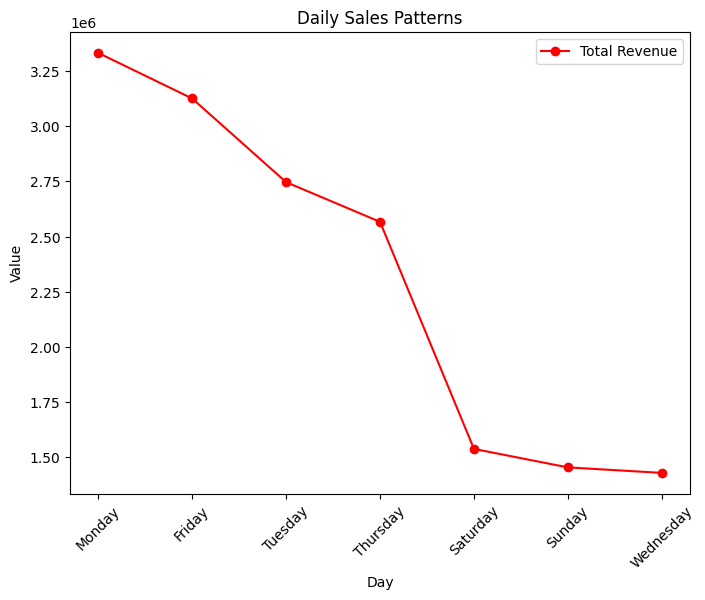

In [59]:
plt.figure(figsize=(8,6))
plt.plot(daily_sales.index, daily_sales['Total Revenue'], marker='o', label='Total Revenue',color='r')
plt.xticks(rotation=45)
plt.xlabel("Day")
plt.ylabel("Value")
plt.title("Daily Sales Patterns")
plt.legend()
plt.show()

as we see: in weekends and wednesday, sales have been dropped so much and then raised up again until at the rest of the week

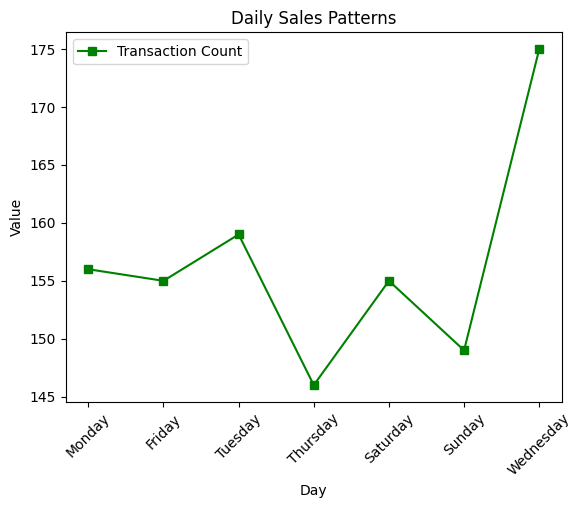

In [60]:
plt.plot(daily_sales.index, daily_sales['Transaction ID'], marker='s', label='Transaction Count',color='g')
plt.xticks(rotation=45)
plt.xlabel("Day")
plt.ylabel("Value")
plt.title("Daily Sales Patterns")
plt.legend()
plt.show()

transaction counts are close to each other through the week

In [61]:
# i tried to plot it but it doesn't work 
weekly_sales=filtered_sales.groupby(filtered_sales['Date'].dt.to_period('W')).agg({'Total Revenue': 'sum','Transaction ID': 'count'})
weekly_sales.reset_index()

,Date,Total Revenue,Transaction ID
0,2024-01-01/2024-01-07,165174.76,18
1,2024-01-08/2024-01-14,275127.85,21
2,2024-01-15/2024-01-21,11672.30,15
3,2024-01-22/2024-01-28,7583.09,19
4,2024-01-29/2024-02-04,23555.22,24
...,...,...,...
64,2025-03-24/2025-03-30,1820170.41,13
65,2025-03-31/2025-04-06,4784.74,10
66,2025-04-07/2025-04-13,18175.46,16
67,2025-04-14/2025-04-20,198807.73,9


In [62]:
# monthly 
monthly_sales=filtered_sales.groupby(filtered_sales['Date'].dt.month_name()).agg({'Total Revenue': 'sum','Transaction ID': 'count'})
monthly_sales.reset_index()

,Date,Total Revenue,Transaction ID
0,April,1065873.06,109
1,August,871577.90,91
2,December,1118478.04,49
3,February,1445980.77,151
4,January,1037853.13,133
5,July,1978777.49,85
6,June,42010.03,70
7,March,3376766.32,142
8,May,779282.70,94
9,November,383488.61,58


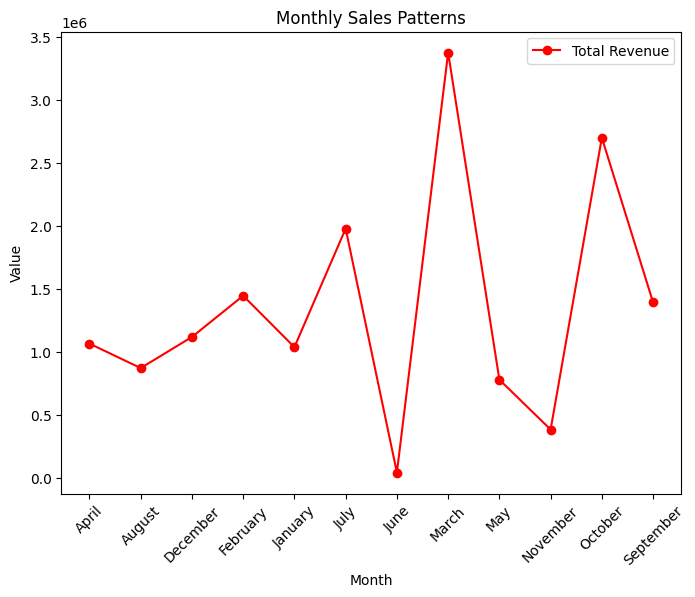

In [63]:
plt.figure(figsize=(8,6))
plt.plot(monthly_sales.index, monthly_sales['Total Revenue'], marker='o', label='Total Revenue',color='r')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Monthly Sales Patterns")
plt.legend()
plt.show()

total revenue differs throughtout months but the highest was in March,July,april, and october

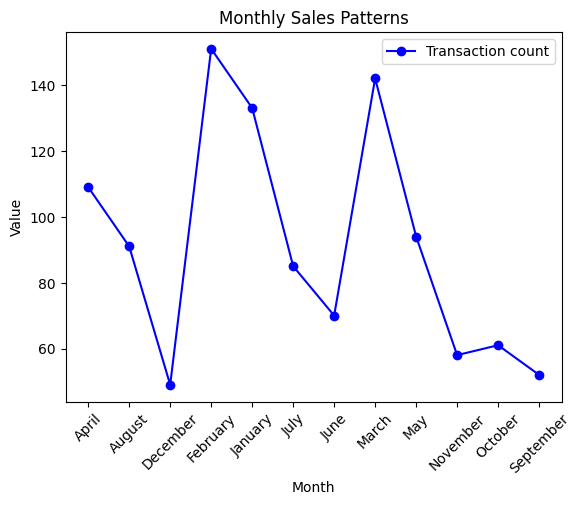

In [64]:
plt.plot(monthly_sales.index, monthly_sales['Transaction ID'], marker='o', label='Transaction count',color='b')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Monthly Sales Patterns")
plt.legend()
plt.show()

as well transaction counts differs throughout months

In [65]:
filtered_sales.groupby(filtered_sales['Date'].dt.month_name()).agg({'Total Revenue': 'sum','Transaction ID': 'count'}).sort_values(by=['Total Revenue','Transaction ID'],ascending=[False,False])

,Total Revenue,Transaction ID
Date,,
March,3376766.32,142
October,2700412.37,61
July,1978777.49,85
February,1445980.77,151
September,1392884.16,52
December,1118478.04,49
April,1065873.06,109
January,1037853.13,133
August,871577.90,91


top performers: march-october-april-july

march and april: may be of seasonal trends (spring)

october: may be cultural event

july: may be of seasonal trends (summer)

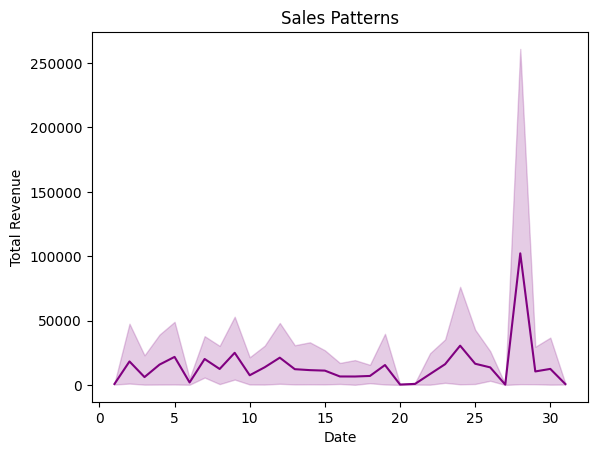

In [66]:
sns.lineplot(x=filtered_sales['Date'].dt.day,y=filtered_sales['Total Revenue'],color='purple')
plt.title('Sales Patterns')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

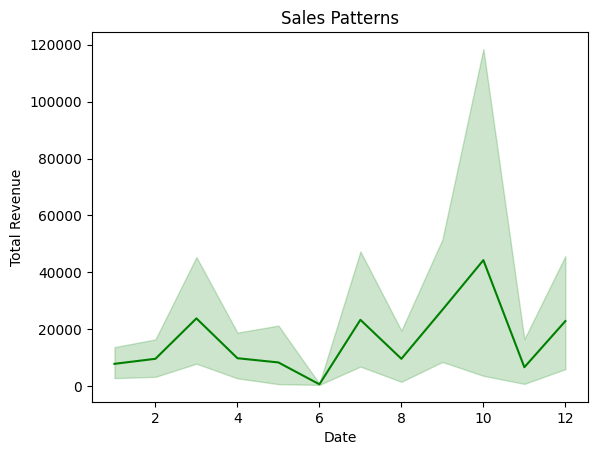

In [67]:
sns.lineplot(x=filtered_sales['Date'].dt.month,y=filtered_sales['Total Revenue'],color='green')
plt.title('Sales Patterns')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

### Product Category Performance

In [68]:
#Revenue distribution across categories
product=filtered_sales.groupby(['Product Category'])['Total Revenue'].agg('sum')/filtered_sales['Total Revenue'].sum()
product.reset_index()

,Product Category,Total Revenue
0,Beauty Products,0.148485
1,Books,0.137857
2,Clothing,0.074647
3,Electronics,0.292049
4,Home Appliances,0.207321
5,Sports,0.139642


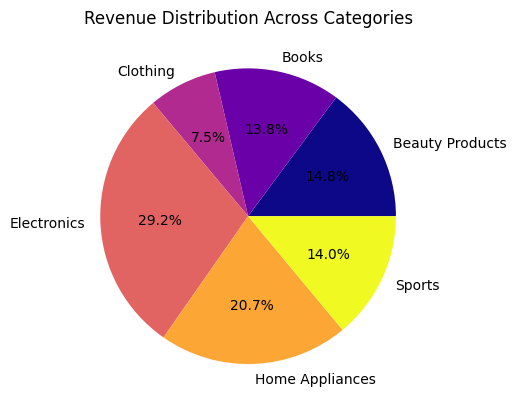

In [69]:
import matplotlib.cm as cm 
color=cm.plasma(np.linspace(0, 1, len(sales.groupby(['Product Category'])['Total Revenue'].agg('sum'))))
plt.pie(filtered_sales.groupby(['Product Category'])['Total Revenue'].agg('sum'),labels=filtered_sales.groupby(['Product Category'])['Total Revenue'].agg('sum').index,
        autopct='%1.1f%%',colors=color)
plt.title('Revenue Distribution Across Categories')
plt.show()

In [70]:
#Average order values by category
avg_cat_price=pd.DataFrame(filtered_sales.groupby(['Product Category'])['Total Revenue'].agg('mean'))
avg_cat_price

,Total Revenue
Product Category,
Beauty Products,13211.435275
Books,12541.408876
Clothing,6533.974108
Electronics,24760.498848
Home Appliances,19075.118977
Sports,12356.672951


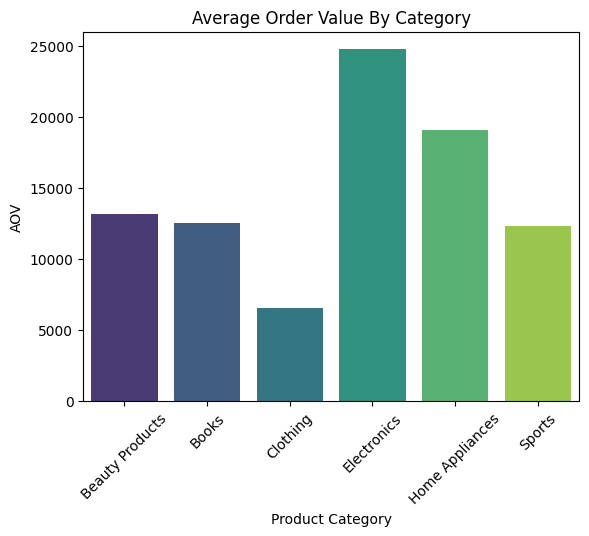

In [71]:
sns.barplot(data=avg_cat_price,x='Product Category',y='Total Revenue',palette='viridis')
plt.title('Average Order Value By Category')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.ylabel('AOV')
plt.show()

In [72]:
#Quantity patterns by category
filtered_sales.groupby(['Product Category'])['Transaction ID'].count().sort_values(ascending=False)

Product Category
Electronics        191
Clothing           185
Sports             183
Beauty Products    182
Books              178
Home Appliances    176
Name: Transaction ID, dtype: int64

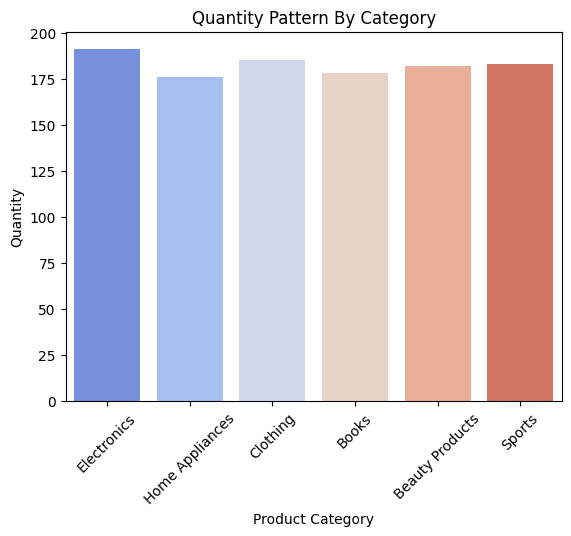

In [73]:
sns.countplot(data=filtered_sales,x='Product Category',palette='coolwarm')
plt.title('Quantity Pattern By Category')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.ylabel('Quantity')
plt.show()

In [74]:
#Category popularity rankings: first by count transactions and total revenue
ranking=filtered_sales.groupby("Product Category").agg({"Transaction ID" : "count","Total Revenue":"sum"}).sort_values(by=['Total Revenue','Transaction ID'],ascending=[False,False])
ranking.reset_index()

,Product Category,Transaction ID,Total Revenue
0,Electronics,191,4729255.28
1,Home Appliances,176,3357220.94
2,Beauty Products,182,2404481.22
3,Sports,183,2261271.15
4,Books,178,2232370.78
5,Clothing,185,1208785.21


In [75]:
# then by mean total revenue
filtered_sales.groupby("Product Category").agg({"Transaction ID" : "count","Total Revenue":"mean"}).sort_values(by=['Total Revenue','Transaction ID'],ascending=[False,False])

,Transaction ID,Total Revenue
Product Category,,
Electronics,191,24760.498848
Home Appliances,176,19075.118977
Beauty Products,182,13211.435275
Books,178,12541.408876
Sports,183,12356.672951
Clothing,185,6533.974108


In [76]:
#Regional sales performance comparison: first by total transactions and total revenue
filtered_sales.groupby('Region').agg({'Total Revenue':'sum','Transaction ID':'count'}).sort_values(by=['Total Revenue','Transaction ID'],ascending=[False,False])

,Total Revenue,Transaction ID
Region,,
North America,5810517.20,365
Europe,5790816.32,358
Asia,4563016.25,352
South America,29034.81,20


In [77]:
# then by meant total revenue
filtered_sales.groupby('Region').agg({'Total Revenue':'mean','Transaction ID':'count'}).sort_values(by=['Total Revenue','Transaction ID'],ascending=[False,False])

,Total Revenue,Transaction ID
Region,,
Europe,16175.464581,358
North America,15919.225205,365
Asia,12963.114347,352
South America,1451.740500,20


In [78]:
#Revenue distribution across regions
region=((filtered_sales.groupby('Region')['Total Revenue'].sum()/filtered_sales['Total Revenue'].sum())*100).sort_values(ascending=False)
region.reset_index()

,Region,Total Revenue
0,North America,35.882043
1,Europe,35.760383
2,Asia,28.178274
3,South America,0.179300


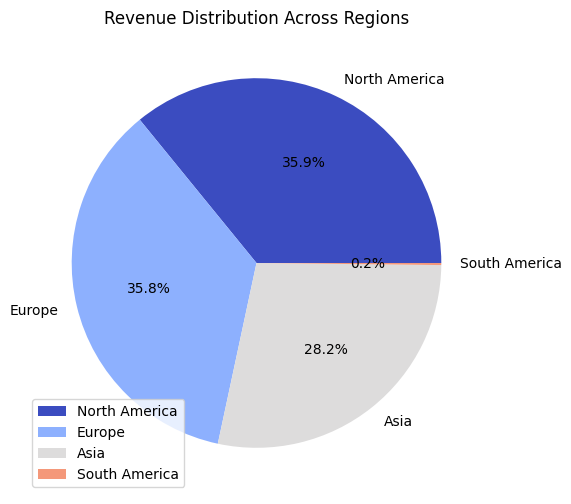

In [79]:
plt.figure(figsize=(8,6))
cmap=cm.get_cmap('coolwarm')
color=(cmap(i / len(region)) for i in range(len(region)))
plt.pie(region,labels=region.index,
        autopct='%1.1f%%',colors=color)
plt.title('Revenue Distribution Across Regions')
plt.legend()
plt.show()

In [80]:
#Regional category preferences
filtered_sales.groupby(['Region','Product Category'])['Transaction ID'].count()

Region         Product Category
Asia           Beauty Products     52
               Books               35
               Clothing            74
               Electronics         54
               Home Appliances     52
               Sports              85
Europe         Beauty Products     77
               Books               52
               Clothing            53
               Electronics         45
               Home Appliances     86
               Sports              45
North America  Beauty Products     49
               Books               88
               Clothing            51
               Electronics         87
               Home Appliances     38
               Sports              52
South America  Beauty Products      4
               Books                3
               Clothing             7
               Electronics          5
               Sports               1
Name: Transaction ID, dtype: int64

In [81]:
filtered_sales.groupby(['Region','Product Category'])['Transaction ID'].count().sort_values(ascending=False)

Region         Product Category
North America  Books               88
               Electronics         87
Europe         Home Appliances     86
Asia           Sports              85
Europe         Beauty Products     77
Asia           Clothing            74
               Electronics         54
Europe         Clothing            53
Asia           Beauty Products     52
               Home Appliances     52
Europe         Books               52
North America  Sports              52
               Clothing            51
               Beauty Products     49
Europe         Sports              45
               Electronics         45
North America  Home Appliances     38
Asia           Books               35
South America  Clothing             7
               Electronics          5
               Beauty Products      4
               Books                3
               Sports               1
Name: Transaction ID, dtype: int64

In [82]:
reg_cat=filtered_sales.groupby(['Region','Product Category'])['Transaction ID'].count()
reg_cat.reset_index()

,Region,Product Category,Transaction ID
0,Asia,Beauty Products,52
1,Asia,Books,35
2,Asia,Clothing,74
3,Asia,Electronics,54
4,Asia,Home Appliances,52
5,Asia,Sports,85
6,Europe,Beauty Products,77
7,Europe,Books,52
8,Europe,Clothing,53
9,Europe,Electronics,45


In [83]:
reg_cat=pd.DataFrame(reg_cat)

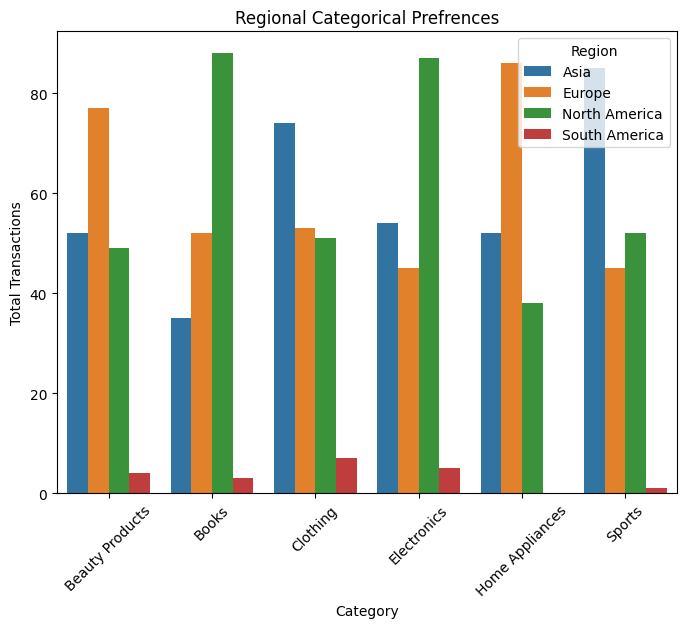

In [84]:
plt.figure(figsize=(8,6))
sns.barplot(data=reg_cat,x='Product Category',y='Transaction ID',hue='Region')
plt.title('Regional Categorical Prefrences')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Total Transactions')
plt.show()

### Payment Method Analysis

In [85]:
payment=((filtered_sales.groupby('Payment Method')['Transaction ID'].count()/filtered_sales['Transaction ID'].count())*100).sort_values(ascending=False)
payment=pd.DataFrame(payment).reset_index()
payment

,Payment Method,Transaction ID
0,Credit Card,50.958904
1,PayPal,29.589041
2,Debit Card,14.155251
3,Cryptocurrency,1.917808
4,Gift Card,1.369863
5,Mobile Payment,1.278539
6,Bank Transfer,0.730594


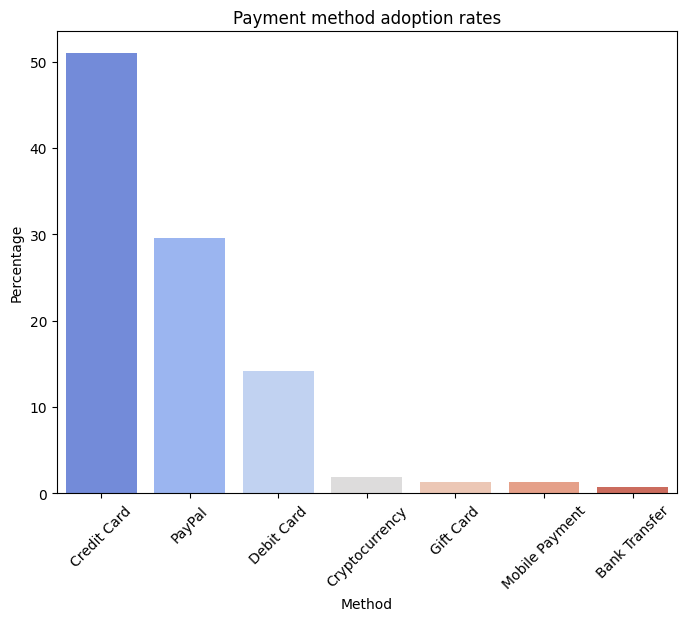

In [86]:
plt.figure(figsize=(8,6))
sns.barplot(data=payment,x='Payment Method',y='Transaction ID',palette='coolwarm')
plt.title('Payment method adoption rates')
plt.xlabel('Method')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.show()

In [87]:
atv=filtered_sales.groupby('Payment Method')['Total Revenue'].mean().sort_values(ascending=False)
atv=pd.DataFrame(atv).reset_index()
atv

,Payment Method,Total Revenue
0,PayPal,19469.675432
1,Credit Card,16781.709570
2,Debit Card,3048.210129
3,Bank Transfer,1540.611250
4,Cryptocurrency,892.022381
5,Mobile Payment,626.519286
6,Gift Card,580.973333


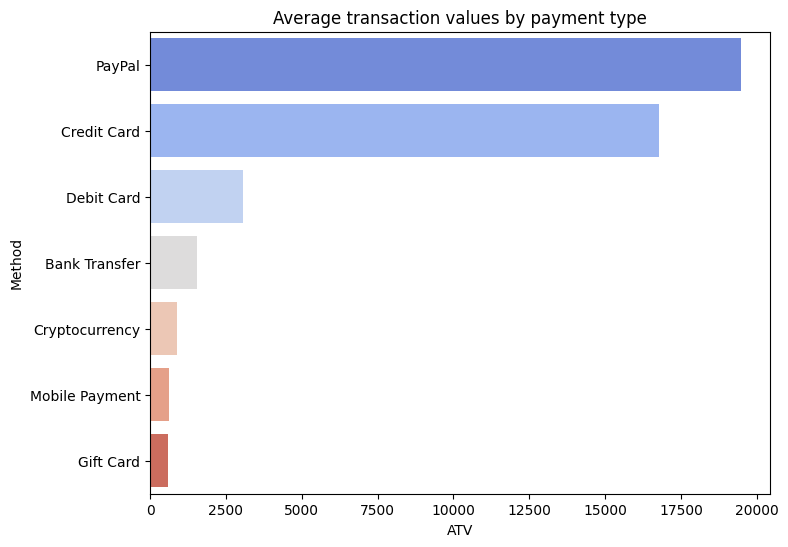

In [88]:
plt.figure(figsize=(8,6))
sns.barplot(data=atv,y='Payment Method',x='Total Revenue',palette='coolwarm',orient='h')
plt.title('Average transaction values by payment type')
plt.ylabel('Method')
plt.xlabel('ATV')
plt.show()

In [89]:
filtered_sales.groupby(['Region','Payment Method'])['Transaction ID'].count()

Region         Payment Method
Asia           Credit Card       191
               Cryptocurrency      4
               Debit Card         75
               Gift Card           8
               Mobile Payment      3
               PayPal             71
Europe         Bank Transfer       1
               Credit Card       113
               Cryptocurrency      1
               Debit Card         47
               Gift Card           2
               Mobile Payment      4
               PayPal            190
North America  Bank Transfer       2
               Credit Card       254
               Cryptocurrency      5
               Debit Card         33
               Gift Card           5
               Mobile Payment      3
               PayPal             63
South America  Bank Transfer       5
               Cryptocurrency     11
               Mobile Payment      4
Name: Transaction ID, dtype: int64

In [90]:
filtered_sales.groupby(['Region','Payment Method'])['Transaction ID'].count().sort_values(ascending=False)

Region         Payment Method
North America  Credit Card       254
Asia           Credit Card       191
Europe         PayPal            190
               Credit Card       113
Asia           Debit Card         75
               PayPal             71
North America  PayPal             63
Europe         Debit Card         47
North America  Debit Card         33
South America  Cryptocurrency     11
Asia           Gift Card           8
South America  Bank Transfer       5
North America  Gift Card           5
               Cryptocurrency      5
Europe         Mobile Payment      4
Asia           Cryptocurrency      4
South America  Mobile Payment      4
North America  Mobile Payment      3
Asia           Mobile Payment      3
North America  Bank Transfer       2
Europe         Gift Card           2
               Cryptocurrency      1
               Bank Transfer       1
Name: Transaction ID, dtype: int64

In [91]:
reg_payment=filtered_sales.groupby(['Region','Payment Method'])['Transaction ID'].count()
reg_payment=pd.DataFrame(reg_payment).reset_index()
reg_payment

,Region,Payment Method,Transaction ID
0,Asia,Credit Card,191
1,Asia,Cryptocurrency,4
2,Asia,Debit Card,75
3,Asia,Gift Card,8
4,Asia,Mobile Payment,3
5,Asia,PayPal,71
6,Europe,Bank Transfer,1
7,Europe,Credit Card,113
8,Europe,Cryptocurrency,1
9,Europe,Debit Card,47


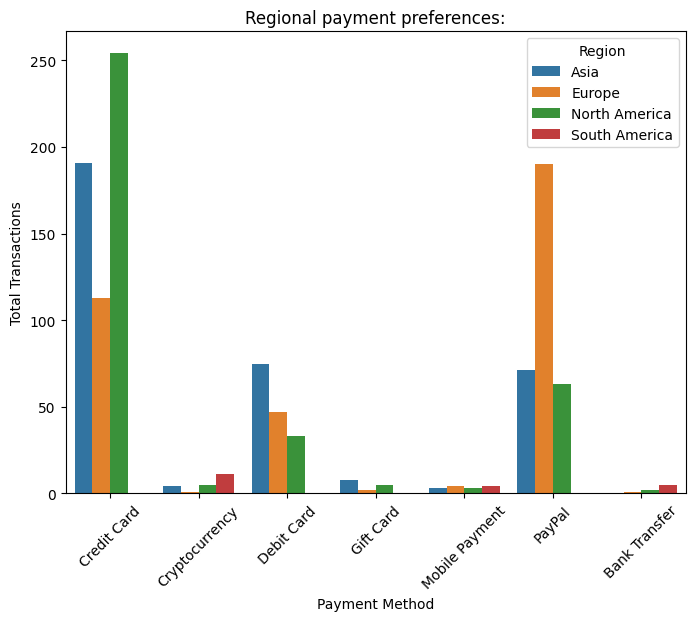

In [92]:
plt.figure(figsize=(8,6))
sns.barplot(data=reg_payment,x='Payment Method',y='Transaction ID',hue='Region')
plt.title('Regional payment preferences:')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Total Transactions')
plt.show()

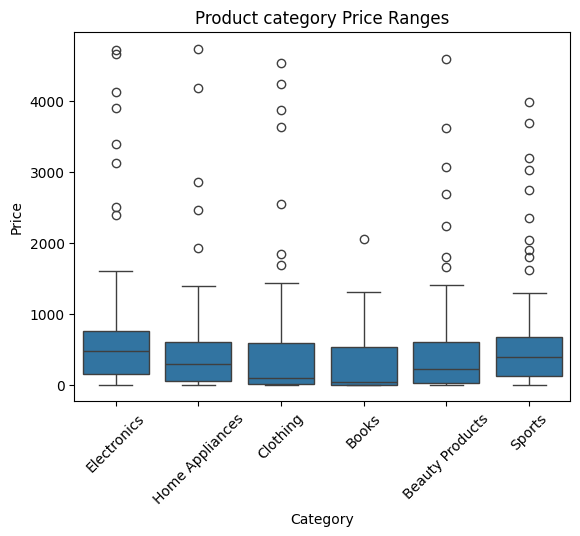

In [93]:
sns.boxplot(data=filtered_sales,x='Product Category',y='Unit Price')
plt.title('Product category Price Ranges')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()

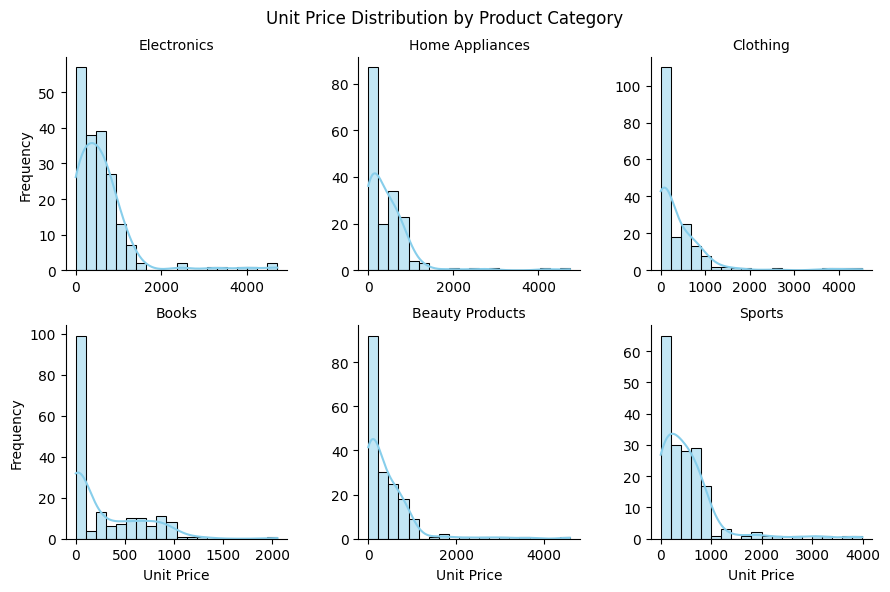

In [94]:
g = sns.FacetGrid(filtered_sales,col="Product Category",col_wrap=3,sharex=False,sharey=False)
g.map(sns.histplot, "Unit Price", bins=20, color="skyblue",kde=True)
g.set_axis_labels("Unit Price", "Frequency")
g.set_titles(col_template="{col_name}")  
plt.subplots_adjust(top=0.9)
g.figure.suptitle("Unit Price Distribution by Product Category")
plt.show()

In [95]:
#Quantity purchase patterns
filtered_sales.groupby('Units Sold')['Transaction ID'].count()

Units Sold
1      434
2      302
3      184
4       74
5       16
      ... 
488      1
489      1
494      1
495      1
499      1
Name: Transaction ID, Length: 82, dtype: int64

In [96]:
#Revenue concentration analysis
rev_concentration=pd.DataFrame({'Trans_percentage':(filtered_sales.groupby('Product Category')['Transaction ID'].count()/filtered_sales['Transaction ID'].count())*100,
                                'Rev_percentage':(filtered_sales.groupby('Product Category')['Total Revenue'].sum()/filtered_sales['Total Revenue'].sum())*100})
rev_concentration

,Trans_percentage,Rev_percentage
Product Category,,
Beauty Products,16.621005,14.848540
Books,16.255708,13.785696
Clothing,16.894977,7.464685
Electronics,17.442922,29.204860
Home Appliances,16.073059,20.732052
Sports,16.712329,13.964166


<Axes: >

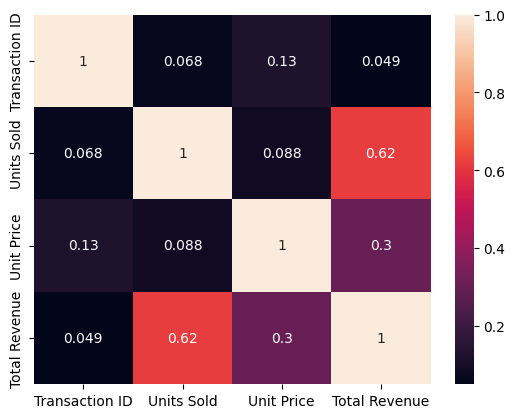

In [97]:
sns.heatmap(filtered_sales.corr(numeric_only=True),annot=True)

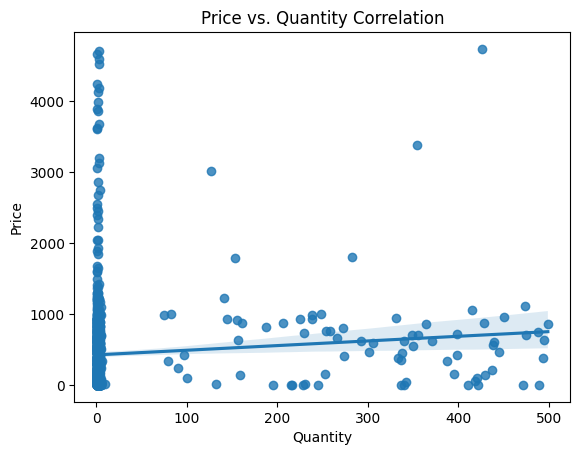

In [98]:
sns.regplot(data=filtered_sales,x='Units Sold',y='Unit Price')
plt.title('Price vs. Quantity Correlation')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

In [99]:
filtered_sales.groupby('Region')['Total Revenue'].mean()

Region
Asia             12963.114347
Europe           16175.464581
North America    15919.225205
South America     1451.740500
Name: Total Revenue, dtype: float64

In [100]:
reg_dist=filtered_sales.groupby('Region')['Total Revenue'].mean()
reg_dist=pd.DataFrame(reg_dist).reset_index()
reg_dist

,Region,Total Revenue
0,Asia,12963.114347
1,Europe,16175.464581
2,North America,15919.225205
3,South America,1451.740500


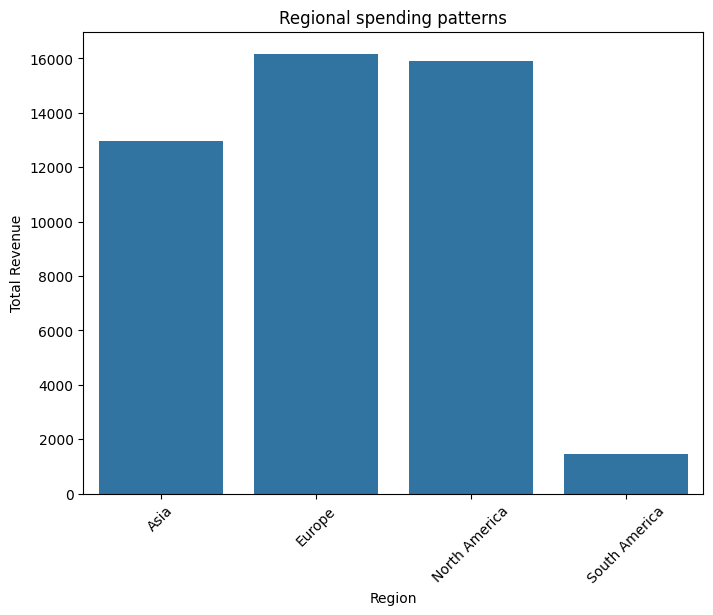

In [101]:
plt.figure(figsize=(8,6))
sns.barplot(data=reg_dist,x='Region',y='Total Revenue')
plt.title('Regional spending patterns')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.show()

In [102]:
cat_payment=filtered_sales.groupby(['Product Category','Payment Method'])['Transaction ID'].count()
cat_payment=pd.DataFrame(cat_payment).reset_index()
cat_payment

,Product Category,Payment Method,Transaction ID
0,Beauty Products,Bank Transfer,1
1,Beauty Products,Credit Card,74
2,Beauty Products,Cryptocurrency,3
3,Beauty Products,Debit Card,26
4,Beauty Products,Gift Card,4
5,Beauty Products,Mobile Payment,3
6,Beauty Products,PayPal,71
7,Books,Credit Card,108
8,Books,Cryptocurrency,6
9,Books,Debit Card,13


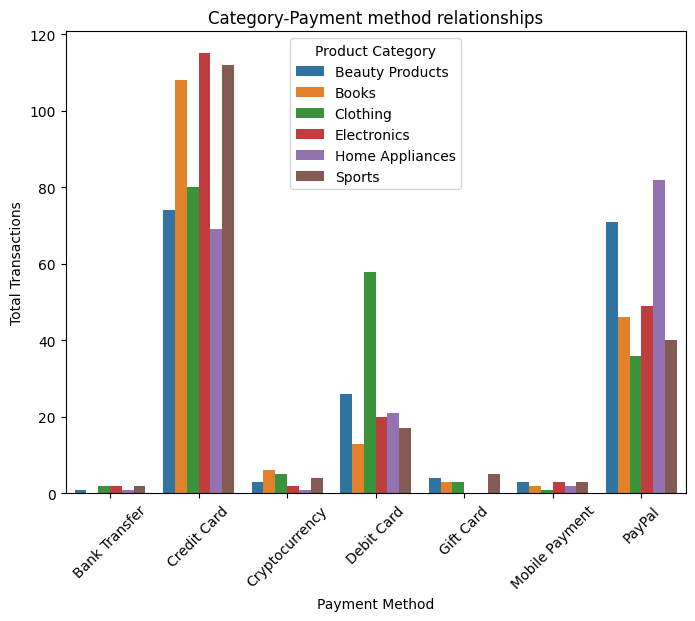

In [103]:
plt.figure(figsize=(8,6))
sns.barplot(data=cat_payment,x='Payment Method',y='Transaction ID',hue='Product Category')
plt.title('Category-Payment method relationships')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Total Transactions')
plt.show()

# Deliverable:
in details in the report

# Feature Engineering & Data Transformation 

### Temporal Features

In [104]:
filtered_sales['Day']=filtered_sales['Date'].dt.day_name()
filtered_sales['Month']=filtered_sales['Date'].dt.month_name()
filtered_sales['Quarter']=filtered_sales['Date'].dt.quarter
filtered_sales.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Units Sold',
       'Unit Price', 'Total Revenue', 'Region', 'Payment Method', 'Day',
       'Month', 'Quarter'],
      dtype='object')

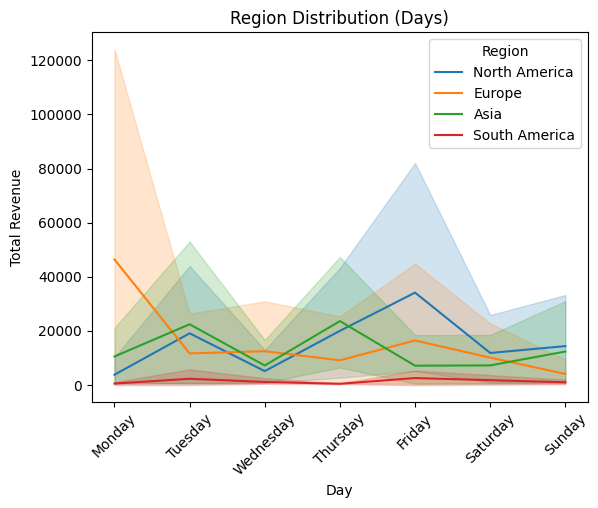

In [105]:
sns.lineplot(data=filtered_sales,x='Day',y='Total Revenue',hue='Region',markers='o')
plt.title('Region Distribution (Days)')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.show()

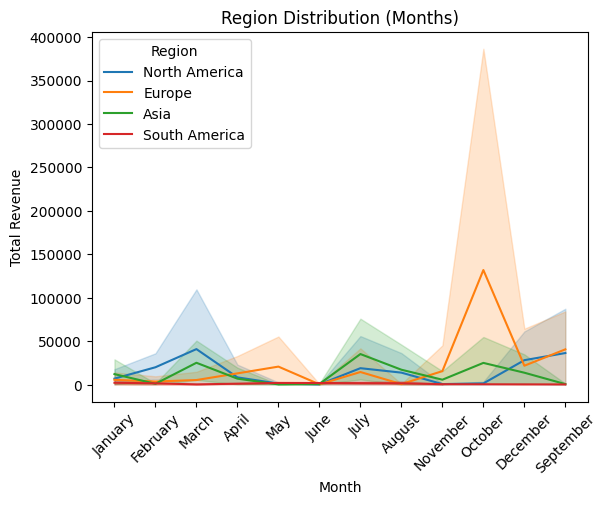

In [106]:
sns.lineplot(data=filtered_sales,x='Month',y='Total Revenue',hue='Region',markers='o')
plt.title('Region Distribution (Months)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.show()

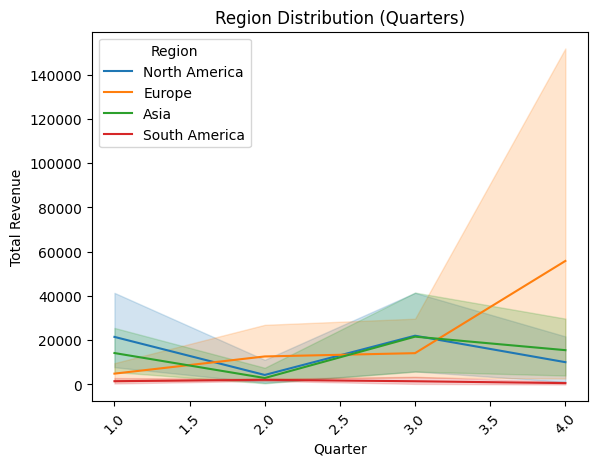

In [107]:
sns.lineplot(data=filtered_sales,x='Quarter',y='Total Revenue',hue='Region',markers='o')
plt.title('Region Distribution (Quarters)')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.show()

In [108]:
season={'Spring':['March','April','May'],'Summer':['June','July','August'],
        'Fall':['September','October','November'],'Winter':['December','January','February']}
def get_season(col:str) -> str:
    '''
    return season according to months

    params:
    col: value of the month (string)

    returns:
    string -> season value
    
    '''
    if col in season['Spring']:
        return 'Spring'
    elif col in season['Summer']:
        return 'Summer'
    elif col in season['Fall']:
        return 'Fall'
    else:
        return 'Winter'
filtered_sales['Season']=filtered_sales['Month'].apply(get_season)
filtered_sales['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

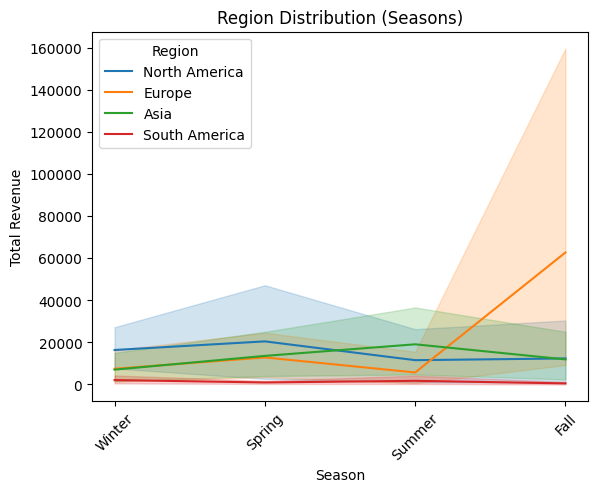

In [109]:
sns.lineplot(data=filtered_sales,x='Season',y='Total Revenue',hue='Region',markers='o')
plt.title('Region Distribution (Seasons)')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.show()

In [110]:
def get_weekend(col: str) -> int:
    if col in ['Saturday','Sunday']:
        '''
        convert value into binary

        param:
        col : string to be converted (weekday or weekend)

        returns:
        binary value :0 or 1
        
        '''
        return 1
    else:
        return 0
filtered_sales['Weekends']=filtered_sales['Day'].apply(get_weekend)
filtered_sales['Weekends'].unique()

array([0, 1], dtype=int64)

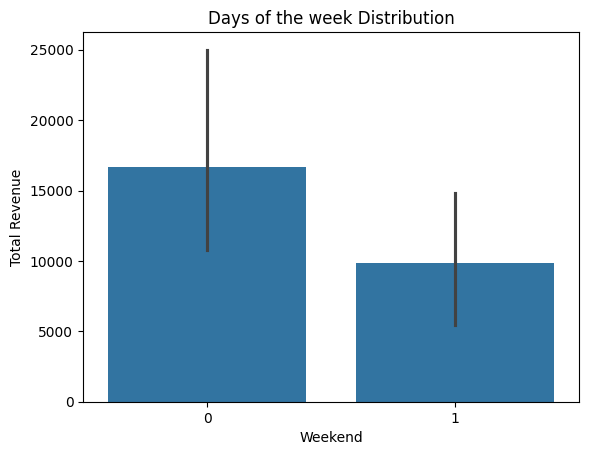

In [111]:
sns.barplot(data=filtered_sales,x='Weekends',y='Total Revenue')
plt.title('Days of the week Distribution')
plt.xlabel('Weekend')
plt.ylabel('Total Revenue')
plt.show()

In [112]:
first_date = sales['Date'].min()
filtered_sales['Days_Since_First'] = (filtered_sales["Date"] - first_date).dt.days
filtered_sales[['Date','Days_Since_First']]

,Date,Days_Since_First
0,2024-01-01,0
1,2024-01-02,1
2,2024-01-03,2
3,2024-01-04,3
4,2024-01-05,4
...,...,...
1150,2024-08-14,226
1151,2024-01-12,11
1152,2024-05-22,142
1153,2024-09-04,247


In [113]:
low=filtered_sales['Unit Price'].quantile(0.25)
high=filtered_sales['Unit Price'].quantile(0.75)
print('Min Range of unit price=',low)
print('Max range of unit price=',high)

Min Range of unit price= 24.240000000000002
Max range of unit price= 639.175


In [114]:
def get_category(col):
    if col<=low:
        return 'Low'
    elif col>= high:
        return 'High'
    else:
        return 'Medium'
    
filtered_sales['Price Category']=filtered_sales['Unit Price'].apply(get_category)
filtered_sales[['Unit Price','Price Category']]

,Unit Price,Price Category
0,999.99,High
1,499.99,Medium
2,69.99,Medium
3,15.99,Low
4,89.99,Medium
...,...,...
1150,362.42,Medium
1151,468.09,Medium
1152,224.60,Medium
1153,1.03,Low


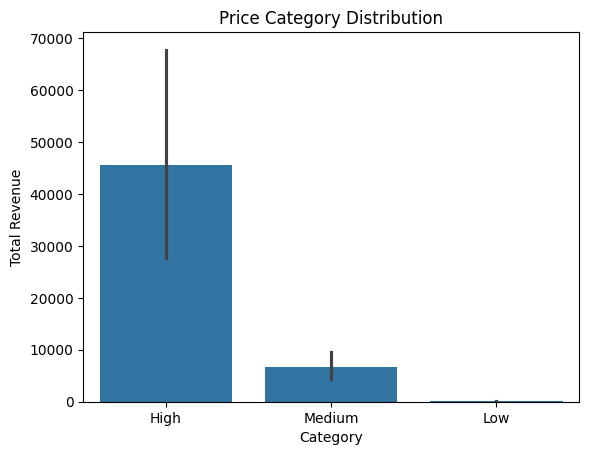

In [115]:
sns.barplot(data=filtered_sales,x='Price Category',y='Total Revenue')
plt.title('Price Category Distribution')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

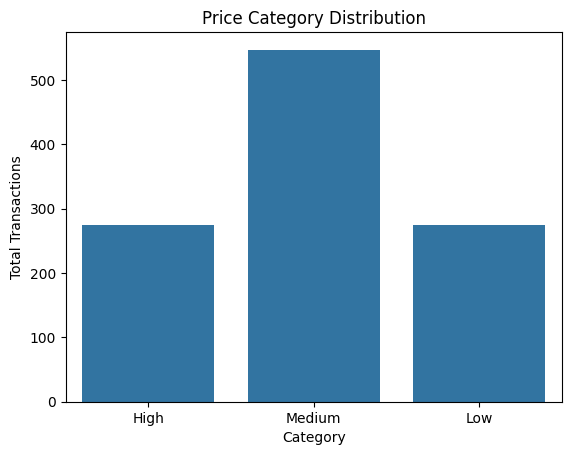

In [116]:
sns.countplot(data=filtered_sales,x='Price Category')
plt.title('Price Category Distribution')
plt.xlabel('Category')
plt.ylabel('Total Transactions')
plt.show()

In [117]:
def get_size(col: int) -> str:
    ''' 
    categorize units sold 

    params:
    col: number of units sold (int)

    returns:
    category according to order size (string)
    
    '''
    if col==1:
        return 'Single item'
    elif col<=6:
        return 'Small bulk'
    else:
        return 'Large bulk'
    
filtered_sales['Order Size']=filtered_sales['Units Sold'].apply(get_size)
filtered_sales[['Order Size','Units Sold']]

,Order Size,Units Sold
0,Small bulk,2
1,Single item,1
2,Small bulk,3
3,Small bulk,4
4,Single item,1
...,...,...
1150,Small bulk,3
1151,Single item,1
1152,Single item,1
1153,Single item,1


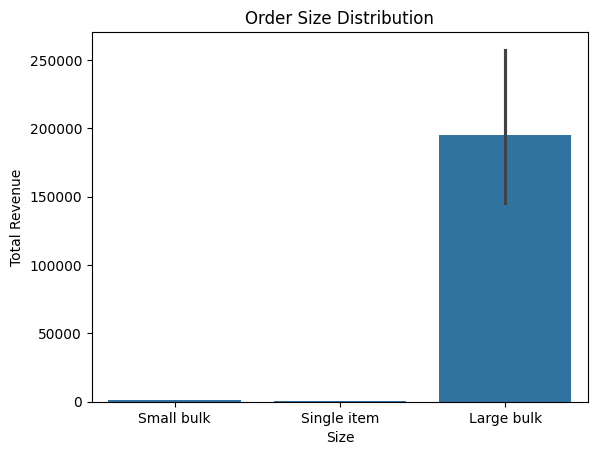

In [118]:
sns.barplot(data=filtered_sales,x='Order Size',y='Total Revenue')
plt.title('Order Size Distribution')
plt.xlabel('Size')
plt.ylabel('Total Revenue')
plt.show()

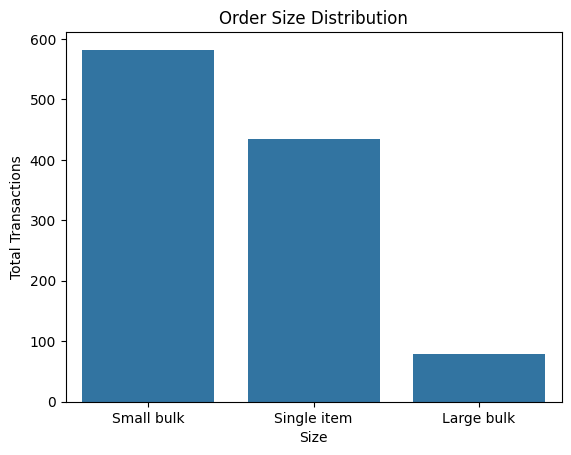

In [119]:
sns.countplot(data=filtered_sales,x='Order Size')
plt.title('Order Size Distribution')
plt.xlabel('Size')
plt.ylabel('Total Transactions')
plt.show()

In [120]:
filtered_sales['Customer Category']=pd.qcut(filtered_sales['Total Revenue'],q=3,labels=['Budget','Standard','Premium'])

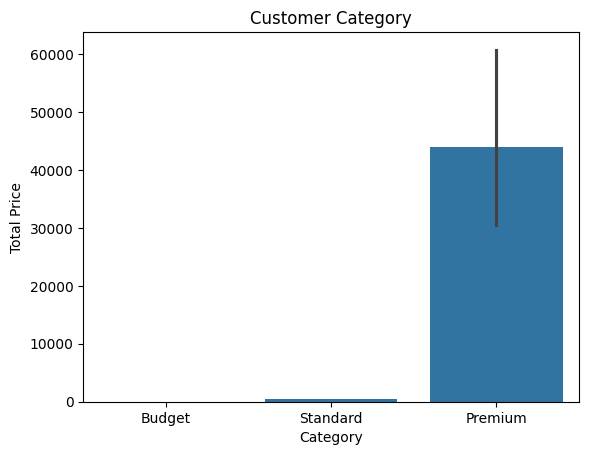

In [121]:
sns.barplot(data=filtered_sales,x='Customer Category',y='Total Revenue')
plt.title('Customer Category')
plt.xlabel('Category')
plt.ylabel('Total Price')
plt.show()

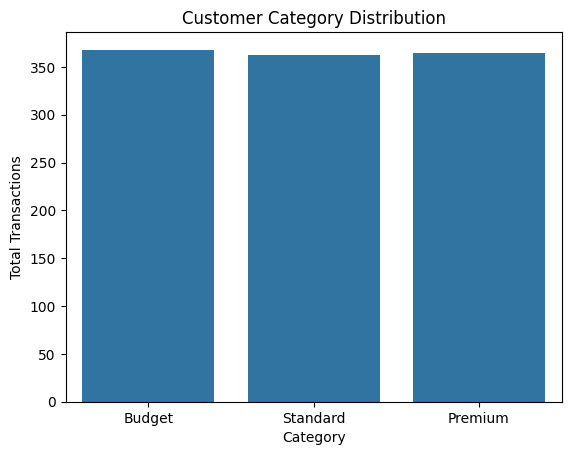

In [122]:
sns.countplot(data=filtered_sales,x='Customer Category')
plt.title('Customer Category Distribution')
plt.xlabel('Category')
plt.ylabel('Total Transactions')
plt.show()

Product category groupings => not applicable here

In [123]:
#Revenue concentration by region -> from her to hypothesis testing we should join them together
df=(filtered_sales.groupby('Region')['Total Revenue'].sum()/filtered_sales['Total Revenue'].sum())*100
rev_region=pd.DataFrame(df).reset_index()
rev_region

,Region,Total Revenue
0,Asia,28.178274
1,Europe,35.760383
2,North America,35.882043
3,South America,0.179300


In [126]:
#Analyze regional competitive advantages
sales.groupby(['Product Category','Region'])['Total Revenue'].sum()

Product Category  Region       
Beauty Products   Asia              845224.24
                  Europe           1505630.66
                  North America      45043.10
                  South America       8583.22
Books             Asia             1067823.14
                  Europe            222105.11
                  North America    1964767.73
                  South America       7118.17
Clothing          Asia              373989.36
                  Europe            347103.54
                  North America     478690.16
                  South America       9002.15
Electronics       Asia             1743809.08
                  Europe           1119104.30
                  North America    1861427.78
                  South America       4914.12
Home Appliances   Asia              211962.08
                  Europe           2087286.81
                  North America    1057972.05
Sports            Asia              330865.81
                  Europe            509585.90
  

In [127]:
sales.groupby(['Payment Method','Region']).agg({'Transaction ID':'count','Total Revenue':'sum'})

Transaction ID  Total Revenue
Payment Method Region                                      
Bank Transfer  Europe                      1        1634.46
               North America               2        1204.90
               South America               5        9485.53
Credit Card    Asia                      192     3226995.95
               Europe                    113     2017799.84
               North America             256     5137572.07
Cryptocurrency Asia                        4         924.09
               Europe                      1           2.00
               North America               5        2487.59
               South America              12       18465.08
Debit Card     Asia                       75       48934.13
               Europe                     47       34884.23
               North America              33      388654.21
Gift Card      Asia                        8        4878.89
               Europe                      2         297.42
               North America               5        3538.29
Mobile Payment Asia                        3        1663.68
               Europe                      4        1550.42
               North America               3        1326.68
               South America               4        4230.49
PayPal         Asia                       72     1290276.97
               Europe                    190     3734647.95
               North America              63     1291373.08

In [124]:
#Regional market penetration metrics
reg_metric=filtered_sales.groupby('Region').agg({'Transaction ID':'count','Total Revenue':'sum'})
reg_metric=pd.DataFrame(reg_metric).reset_index()
reg_metric['avg_revenue']=reg_metric['Total Revenue']/reg_metric['Total Transaction']
reg_metric

KeyError: 'Total Transaction'

In [ ]:
#Average selling price by product category
df2=filtered_sales.groupby('Product Category')['Unit Price'].mean()
avg_price=pd.DataFrame(df2).reset_index()
avg_price

In [ ]:
#Category performance relative to overall marketplace:
avg=filtered_sales['Total Revenue'].mean()
df3=filtered_sales.groupby('Product Category')['Total Revenue'].mean()
avg_performance=pd.DataFrame(df3).reset_index()
avg_performance['Performance']= np.where(avg_performance['Total Revenue']> avg,'Above avg','Below Average')
print(avg)
print(avg_performance)

In [ ]:
adoption_rate = filtered_sales.groupby(["Region", "Payment Method"]).size() / filtered_sales.groupby("Region").size()
adoption_rate

In [ ]:
avg_transaction=filtered_sales['Total Revenue'].sum()/filtered_sales['Transaction ID'].count()
filtered_sales['Value Purchase']=np.where(filtered_sales['Total Revenue']>avg_transaction,'high-value','low-value')
filtered_sales["Multi_Item"] = (filtered_sales["Units Sold"] > 1).astype(int)

In [ ]:
filtered_sales['Product Category']=filtered_sales['Product Category'].astype('category')
filtered_sales['Payment Method']=filtered_sales['Payment Method'].astype('category')
filtered_sales['Region']=filtered_sales['Region'].astype('category')

In [ ]:
# we will do this seperately from the data for hypothesis testing
num_encode=pd.get_dummies(filtered_sales,columns=['Product Category','Payment Method','Region'])
num_encode

In [ ]:
filtered_sales.dtypes

In [ ]:
num_encode.dtypes

In [ ]:
#before concating take a look at the columns of one hot encoding dataframe 

In [ ]:
# needs to be checked
g1=num_encode[num_encode['Region_Asia']==True]['Total Revenue']
g2=num_encode[num_encode['Region_North America']==True]['Total Revenue']
g3=num_encode[num_encode['Region_South America']==True]['Total Revenue']
g4=num_encode[num_encode['Region_Europe']==True]['Total Revenue']

alpha=0.05

f_stat,p_value=stats.f_oneway(g1,g2,g3,g4)
print('f statistics:',f_stat)
print('p value:',p_value)
print('interpretation:')
if p_value< alpha:
    print("Reject the null hypothesis. There is a significant difference in mean transaction value between regions.")
else:
    print("Fail to reject the null hypothesis. No significant difference in mean transaction value between regions.")

In [ ]:
contengincy=pd.crosstab(filtered_sales['Region'],filtered_sales['Product Category'])
chi2, p, dof, ex=stats.chi2_contingency(contengincy)
print('P value',p)
print('interpretation:')
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean transaction value between regions.")
else:
    print("Fail to reject the null hypothesis. No significant difference in mean transaction value between regions.")

In [ ]:
group1=filtered_sales[filtered_sales['Payment Method']=='Credit Card']['Total Revenue']
group2=filtered_sales[filtered_sales['Payment Method']=='PayPal']['Total Revenue']
group3=filtered_sales[filtered_sales['Payment Method']=='Debit Card']['Total Revenue']
group4=filtered_sales[filtered_sales['Payment Method']=='Cryptocurrency']['Total Revenue']
group5=filtered_sales[filtered_sales['Payment Method']=='Gift Card']['Total Revenue']
group6=filtered_sales[filtered_sales['Payment Method']=='Mobile Payment']['Total Revenue']
group7=filtered_sales[filtered_sales['Payment Method']=='Bank Transfer']['Total Revenue']

f_stat,p_value=stats.f_oneway(group1,group2,group3,group4,group4,group5,group6,group7)
print('f statistics:',f_stat)
print('p value:',p_value)
print('interpretation:')
if p_value< alpha:
    print("Reject the null hypothesis. There is a significant difference in mean transaction value between regions.")
else:
    print("Fail to reject the null hypothesis. No significant difference in mean transaction value between regions.")

In [ ]:
contengincy=pd.crosstab(filtered_sales['Region'],filtered_sales['Payment Method'])
chi2, p, dof, ex=stats.chi2_contingency(contengincy)
print('P value',p)
print('interpretation:')
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean transaction value between regions.")
else:
    print("Fail to reject the null hypothesis. No significant difference in mean transaction value between regions.")

In [ ]:
sub1=filtered_sales[filtered_sales['Product Category']=='Beauty Products']['Total Revenue']
sub2=filtered_sales[filtered_sales['Product Category']=='Books']['Total Revenue']
sub3=filtered_sales[filtered_sales['Product Category']=='Clothing']['Total Revenue']
sub4=filtered_sales[filtered_sales['Product Category']=='Electronics']['Total Revenue']
sub5=filtered_sales[filtered_sales['Product Category']=='Home Appliances']['Total Revenue']
sub6=filtered_sales[filtered_sales['Product Category']=='Sports']['Total Revenue']
f_stat,p_value=stats.f_oneway(sub1,sub2,sub3,sub4,sub5,sub6)
print('f statistics:',f_stat)
print('p value:',p_value)
print('interpretation:')
if p_value< alpha:
    print("Reject the null hypothesis. There is a significant difference in mean transaction value between regions.")
else:
    print("Fail to reject the null hypothesis. No significant difference in mean transaction value between regions.")

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('Total Revenue ~ C(Season)+ C(Product Category) + C(Season):C(Product Category)',data=filtered_sales).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
print(anova_table)